In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
from torchvision import models
import pandas as pd
from matplotlib.patches import Circle

In [2]:
# Define a function to return a single stimulus frame (2D numpy array)
def stimfr_rectangle(xn,yn,x0,y0,size,length_ratio,angle,bgval,contrast,stim_underlay=None):
#
#  Return a numpy array that has a rectangle patch
#  in the range -1.0 to 1.0.
#
#  xn    - (int) horizontal width of returned array
#  yn    - (int) vertical height of returned array
#  x0    - (float) horizontal offset of center (pix)
#  y0    - (float) vertical offset of center (pix)
#  size  - (float) square side length (pix)
#  angle - (float) orientation (radians)
#  bgval - (float) first background value [-1.0 ... 1.0]
#  contrast - (float) [0.0 ... 1.0]

    if stim_underlay is None:#if a previous stimulus is not passed apon which to overlay
        s = np.full((yn,xn), bgval, dtype='float32')  # Fill w/ BG value
    else:#if a previous stimulus is indeed passed apon which to overlay
        s = stim_underlay#use that input simulus as the background on which to draw
    for i in range(0,xn):
        for j in range(0,yn):
            if angle < np.pi/2 and angle > 0:
                border1 = (j > (np.tan(np.pi/2 - angle)*i - x0*np.tan(np.pi/2 - angle) + y0 - size/(2*length_ratio*np.sin(angle))))
                border2 = (j < (np.tan(np.pi/2 - angle)*i - x0*np.tan(np.pi/2 - angle) + y0 + size/(2*length_ratio*np.sin(angle))))
                border3 = (j < (-(1/np.tan(np.pi/2 - angle))*i + x0*(1/np.tan(np.pi/2 - angle)) + y0 + size/(2*np.cos(angle))))
                border4 = (j > (-(1/np.tan(np.pi/2 - angle))*i + x0*(1/np.tan(np.pi/2 - angle)) + y0 - size/(2*np.cos(angle))))
            if angle == 0:
                y0_new = x0
                x0_new = y0
                border1 = (j > (y0_new - (size/2)))
                border2 = (j < (y0_new + (size/2)))
                border3 = (i < (x0_new + (size/(2*length_ratio))))
                border4 = (i > (x0_new - (size/(2*length_ratio))))
            if angle == np.pi/2:
                border1 = (i > (y0 - (size/2)))
                border2 = (i < (y0 + (size/2)))
                border3 = (j < (x0 + (size/(2*length_ratio))))
                border4 = (j > (x0 - (size/(2*length_ratio))))
            if angle == np.pi:
                y0_new = x0
                x0_new = y0
                border1 = (j > (y0_new - (size/2)))
                border2 = (j < (y0_new + (size/2)))
                border3 = (i < (x0_new + (size/(2*length_ratio))))
                border4 = (i > (x0_new - (size/(2*length_ratio))))
            if angle > np.pi/2 and angle < np.pi:
                angle_new = np.pi - angle
                border1 = (j > (np.tan(np.pi/2 - angle_new)*i - x0*np.tan(np.pi/2 - angle_new) + y0 - size/(2*np.sin(angle_new))))
                border2 = (j < (np.tan(np.pi/2 - angle_new)*i - x0*np.tan(np.pi/2 - angle_new) + y0 + size/(2*np.sin(angle_new))))
                border3 = (j < (-(1/np.tan(np.pi/2 - angle_new))*i + x0*(1/np.tan(np.pi/2 - angle_new)) + y0 + size/(2*length_ratio*np.cos(angle_new))))
                border4 = (j > (-(1/np.tan(np.pi/2 - angle_new))*i + x0*(1/np.tan(np.pi/2 - angle_new)) + y0 - size/(2*length_ratio*np.cos(angle_new))))
            if border1 and border2 and border3 and border4:
                s[j, i] = contrast
    return s

#Define a function to return a single rectanglular stimulus frame (2D numpy array)
def stimfr_square(xn,yn,x0,y0,size,angle,bgval,contrast,stim_underlay=None):
#
#  Return a numpy array that has a square patch
#  in the range -1.0 to 1.0.
#
#  xn    - (int) horizontal width of returned array
#  yn    - (int) vertical height of returned array
#  x0    - (float) horizontal offset of center (pix)
#  y0    - (float) vertical offset of center (pix)
#  size  - (float) square side length (pix)
#  angle - (float) orientation (radians)
#  bgval - (float) first background value [-1.0 ... 1.0]
#  contrast - (float) [0.0 ... 1.0]
#
    if stim_underlay is None:#if a previous stimulus is not passed apon which to overlay
        s = np.full((yn,xn), bgval, dtype='float32')  # Fill w/ BG value
    else:#if a previous stimulus is indeed passed apon which to overlay
        s = stim_underlay#use that input simulus as the background on which to draw
    for i in range(0,xn):
        for j in range(0,yn):
            if angle > np.pi/2 and angle < np.pi:
                angle_new = np.pi - angle
                border1 = (j > (np.tan(np.pi/2 - angle_new)*i - x0*np.tan(np.pi/2 - angle_new) + y0 - size/(2*np.cos(np.pi/2 - angle_new))))
                border2 = (j < (np.tan(np.pi/2 - angle_new)*i - x0*np.tan(np.pi/2 - angle_new) + y0 + size/(2*np.cos(np.pi/2 - angle_new))))
                border3 = (j < (-(1/np.tan(np.pi/2 - angle_new))*i + x0*(1/np.tan(np.pi/2 - angle_new)) + y0 + size/(2*np.sin(np.pi/2 - angle_new))))
                border4 = (j > (-(1/np.tan(np.pi/2 - angle_new))*i + x0*(1/np.tan(np.pi/2 - angle_new)) + y0 - size/(2*np.sin(np.pi/2 - angle_new))))
            if angle < np.pi/2 and angle > 0:
                border1 = (j > (np.tan(np.pi/2 - angle)*i - x0*np.tan(np.pi/2 - angle) + y0 - size/(2*np.cos(np.pi/2 - angle))))
                border2 = (j < (np.tan(np.pi/2 - angle)*i - x0*np.tan(np.pi/2 - angle) + y0 + size/(2*np.cos(np.pi/2 - angle))))
                border3 = (j < (-(1/np.tan(np.pi/2 - angle))*i + x0*(1/np.tan(np.pi/2 - angle)) + y0 + size/(2*np.sin(np.pi/2 - angle))))
                border4 = (j > (-(1/np.tan(np.pi/2 - angle))*i + x0*(1/np.tan(np.pi/2 - angle)) + y0 - size/(2*np.sin(np.pi/2 - angle))))
            if angle == 0:
                y0_new = x0
                x0_new = y0
                border1 = (j > (y0_new - (size/2)))
                border2 = (j < (y0_new + (size/2)))
                border3 = (i < (x0_new + (size/(2))))
                border4 = (i > (x0_new - (size/(2))))
            if angle == np.pi/2:
                border1 = (i > (y0 - (size/2)))
                border2 = (i < (y0 + (size/2)))
                border3 = (j < (x0 + (size/(2))))
                border4 = (j > (x0 - (size/(2))))
            if angle == np.pi:
                y0_new = x0
                x0_new = y0
                border1 = (j > (y0_new - (size/2)))
                border2 = (j < (y0_new + (size/2)))
                border3 = (i < (x0_new + (size/(2))))
                border4 = (i > (x0_new - (size/(2))))
            if border1 and border2 and border3 and border4:
                s[j, i] = contrast
    return s

def stimfr_overlap(xn,yn,x0,y0,size,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=True,isLeft=True):
    #  Return a numpy array that has a square patch and a rectangular patch overlayed
    #  in the range -1.0 to 1.0.
    #
    #  xn    - (int) horizontal width of returned array
    #  yn    - (int) vertical height of returned array
    #  x0    - (float) horizontal offset of center (pix)
    #  y0    - (float) vertical offset of center (pix)
    #  size  - (float) square side length (pix)
    #  angle - (float) orientation (radians)
    #  bgval - (float) first background value [-1.0 ... 1.0]
    #  contrast - (float) [0.0 ... 1.0]
    # length_ratio - (float) aspect ratio of the rectangle patch
    hypotenuse_dist = ((size/2) + ((size*length_ratio)/2) - overlap_distance)/np.cos(overlap_degree)#straight line distance between center point of first drawn figure to center point of second drawn
    delta_x = np.cos(overlap_degree+angle)*hypotenuse_dist#how far in x direction from first figure center point to the second figure center point
    delta_y = np.sin(overlap_degree+angle)*hypotenuse_dist#how far in y direction from first figure center point to the second figure center point
    if square_first and isLeft:
        s = stimfr_square(xn,yn,x0,y0,size,angle,bgval,square_color)
        x0_rec = x0 + delta_x#center x coordinate of second figure
        y0_rec = y0 - delta_y#center y coordinate of second figure
        s_new = stimfr_rectangle(xn,xn,x0_rec,y0_rec,size,length_ratio,angle,bgval,rectangle_color,s)
    elif square_first and (not isLeft):
        s = stimfr_square(xn,yn,x0,y0,size,angle,bgval,square_color)
        x0_rec = x0 - delta_x#center x coordinate of second figure
        y0_rec = y0 + delta_y#center y coordinate of second figure
        s_new = stimfr_rectangle(xn,xn,x0_rec,y0_rec,size,length_ratio,angle,bgval,rectangle_color,s)
    elif (not square_first) and isLeft:
        s = stimfr_rectangle(xn,xn,x0,y0,size,length_ratio,angle,bgval,rectangle_color)
        x0_sq = x0 + delta_x#center x coordinate of second figure
        y0_sq = y0 - delta_y#center y coordinate of second figure
        s_new = stimfr_square(xn,yn,x0_sq,y0_sq,size,angle,bgval,square_color,s)
    else:
        s = stimfr_rectangle(xn,xn,x0,y0,size,length_ratio,angle,bgval,rectangle_color)
        x0_sq = x0 - delta_x#center x coordinate of second figure
        y0_sq = y0 + delta_y#center y coordinate of second figure
        s_new = stimfr_square(xn,yn,x0_sq,y0_sq,size,angle,bgval,square_color,s)
    return s_new

def create_stim_set(RF_x, RF_y, xn, yn, border_length, angle, bgval = 0.35,
                    length_ratio = 0.75, overlap_degree = np.pi/8, overlap_distance_ratio = 1/8):

    size = border_length
    edge_dist_sq = size/2#distance to figure edge simple square stimulus
    delta_i_sq = np.cos(angle)*edge_dist_sq#pixel distance in x direction to RF center
    delta_j_sq = np.sin(angle)*edge_dist_sq#pixel distance in y direction to RF center

    #square left 1A, 1C
    x0_1AC = RF_x - delta_i_sq#x location of square such that the border of interest is in the center
    y0_1AC = RF_y + delta_j_sq#y location of square such that the border of interest is in the center

    #square right 1B, 1D
    x0_1BD = RF_x + delta_i_sq#x location of square such that the border of interest is in the center
    y0_1BD = RF_y - delta_j_sq#y location of square such that the border of interest is in the center

    contrast = bgval
    s_1A = stimfr_square(xn,yn,x0_1AC,y0_1AC,size,angle,0.0,contrast)
    s_1D = stimfr_square(xn,yn,x0_1BD,y0_1BD,size,angle,0.0,contrast)

    contrast = 0.0
    s_1B = stimfr_square(xn,yn,x0_1BD,y0_1BD,size,angle,bgval,contrast)
    s_1C = stimfr_square(xn,yn,x0_1AC,y0_1AC,size,angle,bgval,contrast)
    
    #where does the RF sit along the figure border based on the offset degree?
    #how far apart are the center points of both drawn figures
    size_r = border_length*(1/(1 - (np.tan(overlap_degree)/2)))*(1 / (1 - overlap_distance_ratio))
    overlap_distance = size_r*overlap_distance_ratio
    hypotenuse_dist = ((size_r/2) + ((size_r*length_ratio)/2) - overlap_distance)/np.cos(overlap_degree)#straight line distance between center point of first drawn figure to center point of second drawn
    border_piece =  (size_r/2) - ((border_length)/2)
    theta_RF = np.arctan(border_piece/(size_r/2))

    edge_dist_sr = np.sqrt(((size_r/2)**2) + (border_piece**2))#distance to overlapped figure edge
    delta_i_sr = np.cos(angle + theta_RF)*edge_dist_sr#pixel distance in x direction to RF center
    delta_j_sr = np.sin(angle + theta_RF)*edge_dist_sr#pixel distance in y direction to RF center

    delta_x = np.cos(overlap_degree+angle)*hypotenuse_dist#how far in x direction from first figure center point to the second figure center point
    delta_y = np.sin(overlap_degree+angle)*hypotenuse_dist#how far in y direction from first figure center point to the second figure center point
    
    #center for 2A, 2A (square left)
    x0_2AC_sq = RF_x - delta_i_sr#x location of square such that the border of interest is in the center
    y0_2AC_sq = RF_y + delta_j_sr#y location of square such that the border of interest is in the center
    x0_2AC = x0_2AC_sq + delta_x#center x coordinate of first drawn figure (rectangle)
    y0_2AC = y0_2AC_sq - delta_y#center y coordinate of first drawn figure (rectangle)

    #center for 2B, 2D (square right)
    x0_2BD_sq = RF_x + delta_i_sr#x location of square such that the border of interest is in the center
    y0_2BD_sq = RF_y - delta_j_sr#y location of square such that the border of interest is in the center
    x0_2BD = x0_2BD_sq - delta_x#center x coordinate of first drawn figure (rectangle)
    y0_2BD = y0_2BD_sq + delta_y#center y coordinate of first drawn figure (rectangle)

    #create stimulus for 2A
    square_color = 1.0
    rectangle_color = 0.0
    s_2A = stimfr_overlap(xn,yn,x0_2AC,y0_2AC,size_r,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False,isLeft=False)

    #create stimulus for 2B
    square_color = 0.0
    rectangle_color = 1.0
    s_2B = stimfr_overlap(xn,yn,x0_2BD,y0_2BD,size_r,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False)

    #create stimulus for 2C
    square_color = 0.0
    rectangle_color = 1.0
    s_2C = stimfr_overlap(xn,yn,x0_2AC,y0_2AC,size_r,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False,isLeft=False)

    #create stimulus for 2D
    square_color = 1.0
    rectangle_color = 0.0
    s_2D = stimfr_overlap(xn,yn,x0_2BD,y0_2BD,size_r,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False)
    
    stims = [s_1A, s_1B, s_1C, s_1D, s_2A, s_2B, s_2C, s_2D]
    return stims

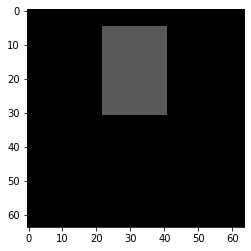

In [3]:
# Create and plot one example stimulus frame for figure 1 stimulus
xn = 64
yn = 64
size = 20.0
angle = np.pi/2
#angle = 0
length_ratio = 0.75 #(height:width)

RF_x = 31#where to center the border of interest x coord
RF_y = 31#where to center the border of interest y coord

edge_dist = size/(2*length_ratio)#distance to figure edge
delta_i = np.sin(angle)*edge_dist#pixel distance in x direction to RF center
delta_j = np.cos(angle)*edge_dist#pixel distance in y direction to RF center

#square left 1A, 1C
x0_1AC = RF_x - delta_i#x location of square such that the border of interest is in the center
y0_1AC = RF_y + delta_j#y location of square such that the border of interest is in the center

#square right 1B, 1D
x0_1BD = RF_x + delta_i#x location of square such that the border of interest is in the center
y0_1BD = RF_y - delta_j#y location of square such that the border of interest is in the center

bgval = 0.0
contrast = 0.35

rect_test = stimfr_rectangle(xn,yn,x0_1AC,y0_1AC,size,length_ratio, angle,bgval,contrast)

plt.imshow(rect_test, cmap='gray', vmin=0, vmax=1)
plt.show()

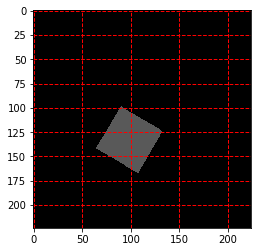

In [4]:
# Create and plot one example stimulus frame for figure 1 stimulus
xn = 224
yn = 224
size = 50.0
angle = np.pi/3

RF_x = 111#where to center the border of interest x coord
RF_y = 111#where to center the border of interest y coord

edge_dist = size/2#distance to figure edge
delta_i = np.cos(angle)*edge_dist#pixel distance in x direction to RF center
delta_j = np.sin(angle)*edge_dist#pixel distance in y direction to RF center

#square left 1A, 1C
x0_1AC = RF_x - delta_i#x location of square such that the border of interest is in the center
y0_1AC = RF_y + delta_j#y location of square such that the border of interest is in the center

#square right 1B, 1D
x0_1BD = RF_x + delta_i#x location of square such that the border of interest is in the center
y0_1BD = RF_y - delta_j#y location of square such that the border of interest is in the center

bgval = 0.0
contrast = 0.35
s_1A = stimfr_square(xn,yn,x0_1AC,y0_1AC,size,angle,bgval,contrast)
s_1D = stimfr_square(xn,yn,x0_1BD,y0_1BD,size,angle,bgval,contrast)

bgval = 0.35
contrast = 0.0
s_1B = stimfr_square(xn,yn,x0_1BD,y0_1BD,size,angle,bgval,contrast)
s_1C = stimfr_square(xn,yn,x0_1AC,y0_1AC,size,angle,bgval,contrast)

im = plt.imshow(s_1A, cmap='gray', vmin=0, vmax=1)
ax = plt.gca();
ax.grid(color='r', linestyle='--', linewidth=1)



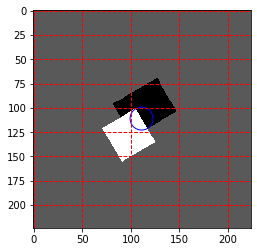

In [5]:
#Create and plot example square and rectangular overlap stimulus frame, figure 2 stimulus
#Global constants
xn = 224
yn = 224
size = 40
angle = np.pi/6
bgval = 0.35
length_ratio = 0.75 #(height:width)
overlap_degree = np.pi/6
overlap_distance = size/6

RF_x = 111#where to center the border of interest x coord
RF_y = 111#where to center the border of interest y coord

#how far apart are the center points of both drawn figures
hypotenuse_dist = ((size/2) + ((size*length_ratio)/2) - overlap_distance)/np.cos(overlap_degree)#straight line distance between center point of first drawn figure to center point of second drawn
delta_x = np.cos(overlap_degree+angle)*hypotenuse_dist#how far in x direction from first figure center point to the second figure center point
delta_y = np.sin(overlap_degree+angle)*hypotenuse_dist#how far in y direction from first figure center point to the second figure center point

#where does the RF sit along the figure border based on the offset degree?
border_length = size - hypotenuse_dist*np.sin(overlap_degree)
border_piece =  (size/2) - ((border_length)/2)
theta_RF = np.arctan(border_piece/(size/2))

edge_dist = np.sqrt(((size/2)**2) + (border_piece**2))#distance to overlapped figure edge
delta_i = np.cos(angle + theta_RF)*edge_dist#pixel distance in x direction to RF center
delta_j = np.sin(angle + theta_RF)*edge_dist#pixel distance in y direction to RF center

#center for 2A, 2A (square left)
x0_2AC_sq = RF_x - delta_i#x location of square such that the border of interest is in the center
y0_2AC_sq = RF_y + delta_j#y location of square such that the border of interest is in the center
x0_2AC = x0_2AC_sq + delta_x#center x coordinate of first drawn figure (rectangle)
y0_2AC = y0_2AC_sq - delta_y#center y coordinate of first drawn figure (rectangle)

#center for 2B, 2D (square right)
x0_2BD_sq = RF_x + delta_i#x location of square such that the border of interest is in the center
y0_2BD_sq = RF_y - delta_j#y location of square such that the border of interest is in the center
x0_2BD = x0_2BD_sq - delta_x#center x coordinate of first drawn figure (rectangle)
y0_2BD = y0_2BD_sq + delta_y#center y coordinate of first drawn figure (rectangle)

#create stimulus for 2A
square_color = 1.0
rectangle_color = 0.0
s_2A = stimfr_overlap(xn,yn,x0_2AC,y0_2AC,size,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False,isLeft=False)

#create stimulus for 2B
square_color = 0.0
rectangle_color = 1.0
s_2B = stimfr_overlap(xn,yn,x0_2BD,y0_2BD,size,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False)

#create stimulus for 2C
square_color = 0.0
rectangle_color = 1.0
s_2C = stimfr_overlap(xn,yn,x0_2AC,y0_2AC,size,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False,isLeft=False)

#create stimulus for 2D
square_color = 1.0
rectangle_color = 0.0
s_2D = stimfr_overlap(xn,yn,x0_2BD,y0_2BD,size,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False)


im = plt.imshow(s_2A, cmap='gray', vmin=0, vmax=1);
ax = plt.gca();
ax.grid(color='r', linestyle='--', linewidth=1)


diam = size - hypotenuse_dist*np.sin(overlap_degree)
circ = Circle((RF_x,RF_y),diam/2, ec='b',fill=False)
ax.add_patch(circ)

In [6]:
# #Global constants
# xn = 224
# yn = 224
# angle = np.pi/6
# border_length = 50

# RF_x = 111#where to center the border of interest x coord
# RF_y = 111#where to center the border of interest y coord

# stimuli = create_stim_set(RF_x, RF_y, xn, yn, border_length, angle)

# #how far apart are the center points of both drawn figures

diam1 = border_length
im = plt.imshow(stimuli[7], cmap='gray', vmin=0, vmax=1);
ax = plt.gca();
ax.grid(color='r', linestyle='--', linewidth=1)
circ1 = Circle((RF_x,RF_y), diam1/2, ec='b',fill=False)
ax.add_patch(circ1)

NameError: name 'stimuli' is not defined

In [7]:
# Take in RF center data from .npy files to position the stimuli
# Reading the .npy file
rfs_2 = np.load('n01_stat_conv2_mrf_4a.npy')  # Load stats for conv2 of alexnet
rfs_3 = np.load('n01_stat_conv3_mrf_4a.npy')  # Load stats for conv3 of alexnet
rfs_4 = np.load('n01_stat_conv4_mrf_4a.npy')  # Load stats for conv4 of alexnet
rfs_5 = np.load('n01_stat_conv5_mrf_4a.npy')  # Load stats for conv5 of alexnet

#load .npy files containing RF orientation information
rfs_2_stats = np.load('n01_stat_conv2_siz_1.npy')# Load size and orientation stats for conv2 r of alexnet
rfs_3_stats = np.load('n01_stat_conv3_siz_1.npy')# Load size and orientation stats for conv3 r of alexnet
rfs_4_stats = np.load('n01_stat_conv4_siz_1.npy')# Load size and orientation stats for conv4 r of alexnet
rfs_5_stats = np.load('n01_stat_conv5_siz_1.npy')# Load size and orientation stats for conv5 r of alexnet

#insert column of values delineating the layer (kernel) of each conv layer
rfs_2 = np.insert(rfs_2, 0, range(0, len(rfs_2)), axis=1)
rfs_3 = np.insert(rfs_3, 0, range(0, len(rfs_3)), axis=1)
rfs_4 = np.insert(rfs_4, 0, range(0, len(rfs_4)), axis=1)
rfs_5 = np.insert(rfs_5, 0, range(0, len(rfs_5)), axis=1)

#sort based on f_nat (descending order)
rfs_2_sorted = rfs_2[rfs_2[:,5].argsort()[::-1]]
rfs_3_sorted = rfs_3[rfs_3[:,5].argsort()[::-1]]
rfs_4_sorted = rfs_4[rfs_4[:,5].argsort()[::-1]]
rfs_5_sorted = rfs_5[rfs_5[:,5].argsort()[::-1]]

In [8]:
#    0 - hi SF
#    4 - strong ori tuning, mid SF
#   21 - weak ori tuning, hi SF
#   24 - weak ori tuning, hi SF
#   33 - Very weak response
#   40 - *** good ori, medium SF    *** EXAMPLE
#   48 - ** mild ori, mid SF
#   50 - ** strong ori, hi SF
#   52 - weak response
#   60 - mild ori-tuning
#   75 - ** good ori tuning, hi SF
#   88 - hi SF
#   94 - * hi SF
#   98 - ** good ori, med SF
#  102 - ** good ori
#  124 - * some ori, hi SF
#  135 - *** Good ori, sf, size  ?
#  141 - ** good ori, hi SF
#  144 - ** good ori, hi SF
#  150 - * good ori, low resp.
#  153 - ** good ori, hi SF        *** EXAMPLE
#  154 - * good
#  155 - ** good ori, hi SF
#  167 - ** good ori, hi SF
#  168 - ** good ori, hi SF
#  179 - *** strong ori, med-hi SF  *** EXAMPLE
#  185 - ** good ori, hi SF
#  189 - *** strong tuning, mid SF

def makeStimSet(sorted_stats, stats, xn, yn, keep_thresh=0.4):
    arr = sorted_stats[:,5]
    r = np.where(arr > keep_thresh)[0]
    keep_rows = r[-1]
    kept = sorted_stats[:keep_rows,:]
    stim_dict = {}#dictionary to hold stimulus tensors specific to the top responding kernel layers as determined by f_nat
    for i in range(0, len(kept)):
        kernel = int(kept[i, 0])#kernel of conv layer
        COM_0 = kept[i, 2]#center of mass (pix) along vertical image axis (center=0)
        COM_1 = kept[i, 2]#center of mass (pix) along horizontal image axis (center=0)
        RF_x = 111 + COM_0
        RF_y = 111 + COM_1
        ori = stats[kernel, 3]#get angle (orientation) in degrees of RF for this kernel layer
        angle = (ori*np.pi)/180
        border_length = stats[kernel, 5]#get RF size for this kernel layer

        stimuli = create_stim_set(RF_x, RF_y, xn, yn, border_length, angle)

        nstim = len(stimuli)

        d = np.empty((nstim,3,xn,yn), dtype='float32')

        k = 0
        for s in stimuli:
            d[k][0] = s#Red channel
            d[k][1] = d[k][0]   # Repeat same image in Green channel
            d[k][2] = d[k][0]   # Repeat same image in Blue channel
            k += 1

        tt = torch.tensor(d)
        #create transform to normalize images
        transform = transforms.Normalize([0.485, 0.456, 0.406], 
                                  [0.229, 0.224, 0.225],  inplace=True)#
        for j in range(nstim):
            transform(tt[j,:,:,:])

        stim_dict[str(kernel)] = tt
    
    return stim_dict

#generate image data set tailored to the RF of the top f_nat layers of conv2, conv3, conv4, conv5
xn = 224
yn = 224
fnat_thresh = 0.4
#get stims for conv2
stim_dict_2 = makeStimSet(rfs_2_sorted, rfs_2_stats, xn, yn, fnat_thresh)
#get stims for conv3
stim_dict_3 = makeStimSet(rfs_3_sorted, rfs_3_stats, xn, yn, fnat_thresh)
#get stims for conv4
stim_dict_4 = makeStimSet(rfs_4_sorted, rfs_4_stats, xn, yn, fnat_thresh)
#get stims for conv5
stim_dict_5 = makeStimSet(rfs_5_sorted, rfs_5_stats, xn, yn, fnat_thresh)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


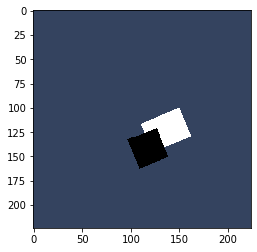

In [10]:
# Now plot the kth stimulus
loi = list(stim_dict.keys())
k = 6
tt = stim_dict_2[loi[0]]#grab a dictionary key and plot an example image
npimg = tt[k].numpy()
npimg = npimg / 2 + 0.5     # Convert amplitudes from [-1..1] into [0..1]
plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Make RGB dimension be last
plt.show()

In [10]:
# Present the stimulus set to AlexNet, get responses from an early layer
def getResponses(layer, stim_dict):
    response_dict = {}
    for i in range(0, len(stim_dict.keys())):
        mod = models.alexnet(pretrained=True)
        kernel_key = list(stim_dict.keys())[i]
        kernel = int(kernel_key)
        imt =  stim_dict[kernel_key] #image set for given kernel transformed for AlexNet

        m = mod.features[:layer]
        r = m.forward(imt)

        max_inds = np.empty((8,2))#hold indices of maximum entries
        min_inds = np.empty((8,2))#hold indices of minimum entries
        maximums = np.empty((8))#hold maximum values
        averages = np.empty((8))#hold average values
        minimums = np.empty((8))#hold minimum values

        for j in range(8):#iterate over each image type
            a = r[j, kernel,:,:].cpu().detach().numpy()#extract data for given image and feature layer
            maximums[j] = np.amax(a)#find maximum value
            averages[j] = np.mean(a)#calculate average value
            minimums[j] = np.amin(a)#find minimum value

            ind_max = np.unravel_index(np.argmax(a, axis=None), a.shape)
            max_inds[j, 1], max_inds[j, 0] = ind_max[0], ind_max[1]
            ind_min = np.unravel_index(np.argmin(a, axis=None), a.shape)
            min_inds[j, 1], min_inds[j, 0] = ind_min[0], ind_min[1]

        response_dict[kernel_key] = [max_inds, min_inds, maximums, averages, minimums]
    return response_dict

#layer = 4  get responses from this layer (conv2)
response_dict_2 = getResponses(4, stim_dict_2)
#layer = 7 get response from conv3
response_dict_3 = getResponses(7, stim_dict_3)
#layer = 9 get response from conv4
response_dict_4 = getResponses(9, stim_dict_4)
#layer = 11 get response from conv5
response_dict_5 = getResponses(11, stim_dict_5)

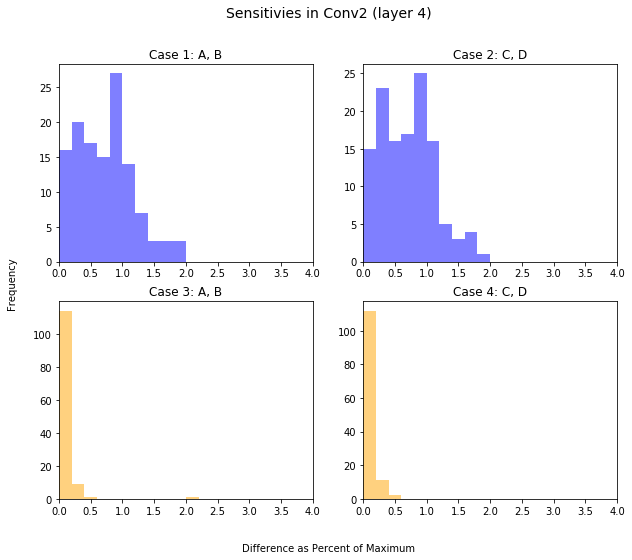

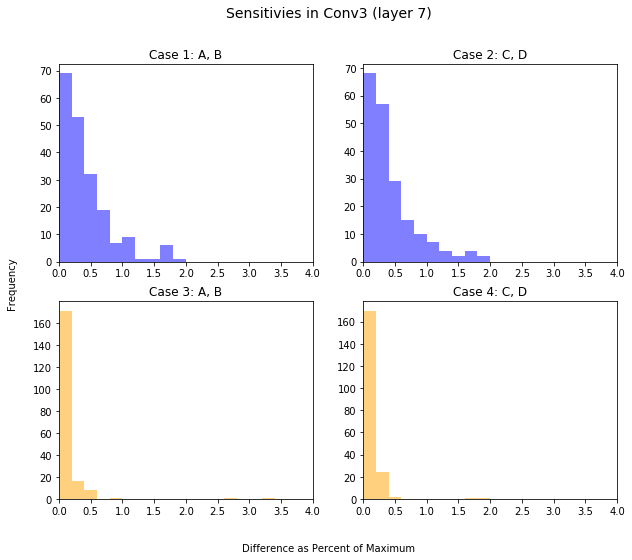

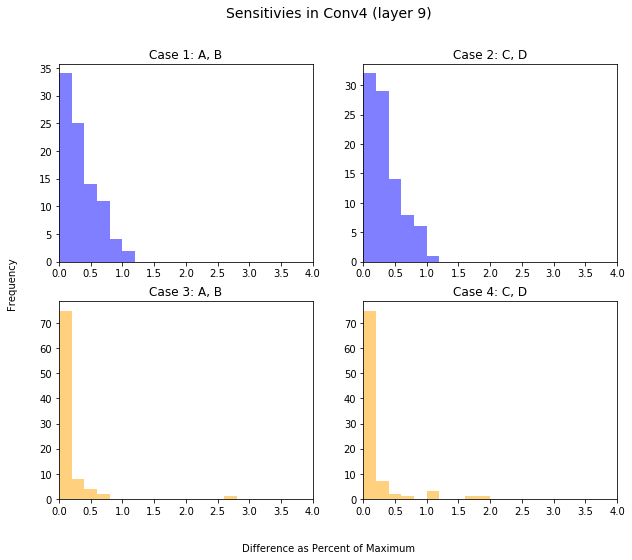

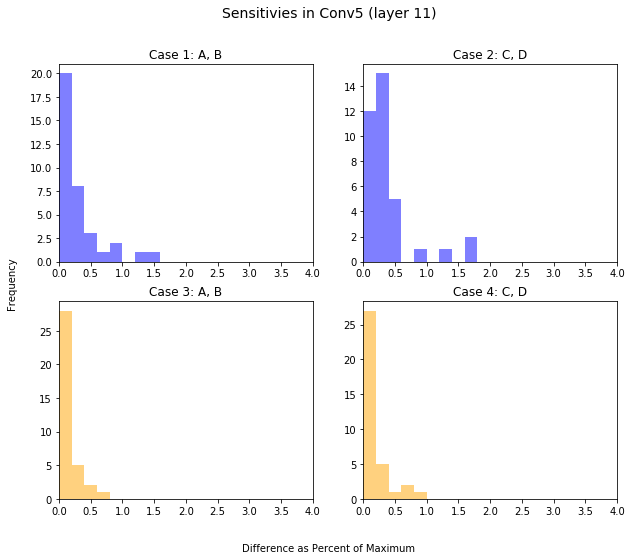

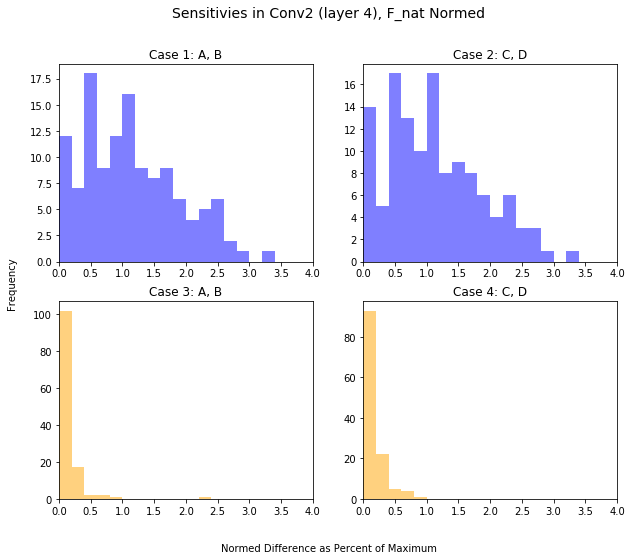

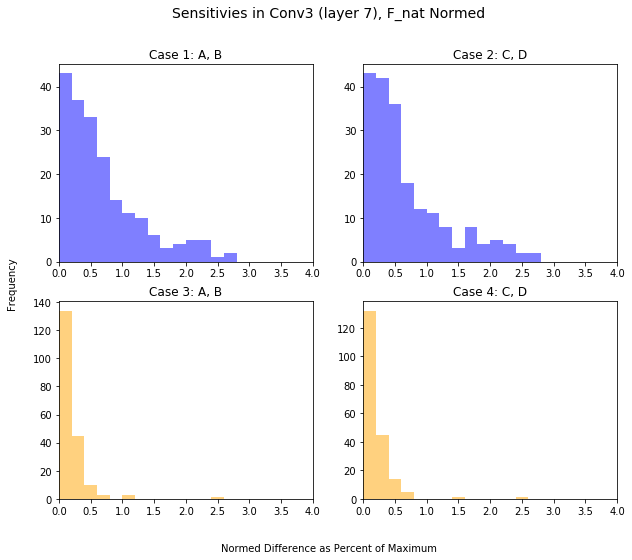

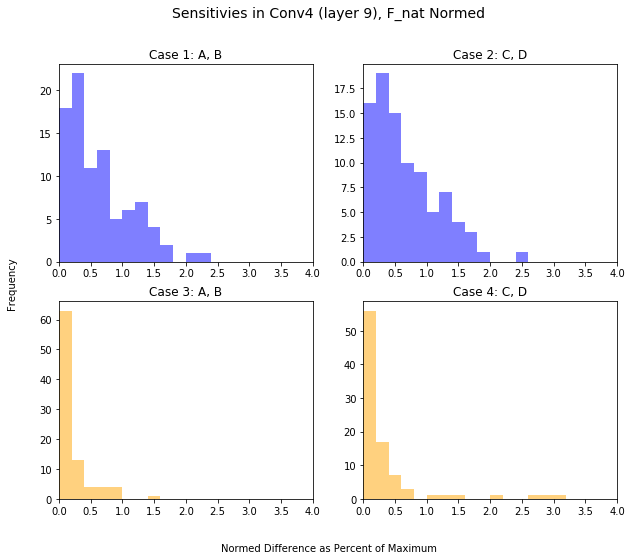

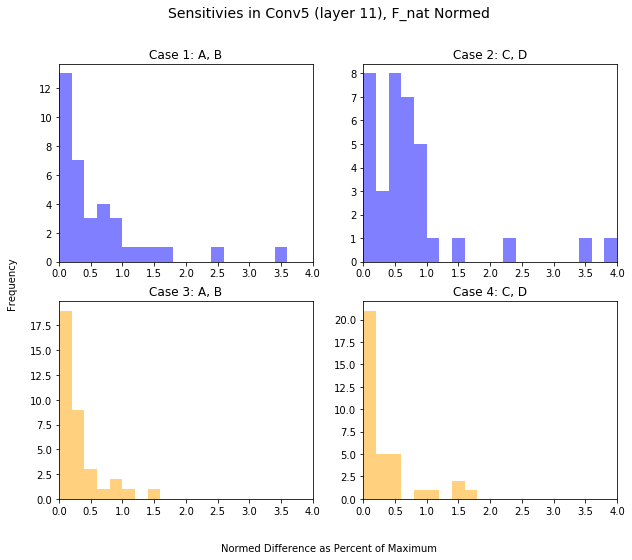

In [11]:
#see if any feature layers respond differently to 1A and 1B, and/or 1C and 1D
#see if any feature layers respond differently to 2A and 2B, and/or 2C and 2D
def analyzeResponses(response_dict):
    sensitivities = {'1AB':[], '1CD':[], '2AB':[], '2CD':[]}
    sensitivities_per_kernel = np.empty((len(response_dict.keys()), 5))
    BO_nodes_av = []
    i = 0
    for kernel in response_dict.keys():#iterate over each analyzed kernel (i.e. filter or feature layer)
        averages = response_dict[kernel][3]
        s1ab = (np.abs(averages[0] - averages[1])) / (np.maximum(np.abs(averages[0]), np.abs(averages[1])))
        s1cd = (np.abs(averages[2] - averages[3])) / (np.maximum(np.abs(averages[2]), np.abs(averages[3])))
        s2ab = (np.abs(averages[4] - averages[5])) / (np.maximum(np.abs(averages[3]), np.abs(averages[4])))
        s2cd = (np.abs(averages[6] - averages[7])) / (np.maximum(np.abs(averages[5]), np.abs(averages[6])))
        sensitivities_per_kernel[i,0] = int(kernel)
        sensitivities_per_kernel[i,1] = s1ab
        sensitivities_per_kernel[i,2] = s1cd
        sensitivities_per_kernel[i,3] = s2ab
        sensitivities_per_kernel[i,4] = s2cd
        i = i + 1

    return sensitivities_per_kernel

def fnatNorm(sensitivities, stats):
    normed_sensitivities = np.empty((sensitivities.shape[0], 5))
    for i in range(sensitivities.shape[0]):
        kernel = int(sensitivities[i, 0])
        f_nat = stats[kernel, 5]
        normed_sensitivities[i, 0] = kernel
        normed_sensitivities[i, 1] = sensitivities[i, 1] / f_nat
        normed_sensitivities[i, 2] = sensitivities[i, 2] / f_nat
        normed_sensitivities[i, 3] = sensitivities[i, 3] / f_nat
        normed_sensitivities[i, 4] = sensitivities[i, 4] / f_nat
    return normed_sensitivities

bins = 20
# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (0, 4)

sensitivities_2 = analyzeResponses(response_dict_2)
sensitivities_2_normed = fnatNorm(sensitivities_2, rfs_2)
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0, 0].hist(sensitivities_2[:,1], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('Case 1: A, B')
axs[0, 1].hist(sensitivities_2[:,2], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 1].set_title('Case 2: C, D')
axs[1, 0].hist(sensitivities_2[:,3], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 0].set_title('Case 3: A, B')
axs[1, 1].hist(sensitivities_2[:,4], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 1].set_title('Case 4: C, D')

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim)
# Set common labels
fig.suptitle("Sensitivies in Conv2 (layer 4)", fontsize=14)
fig.text(0.5, 0.04, 'Difference as Percent of Maximum', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')


sensitivities_3 = analyzeResponses(response_dict_3)
sensitivities_3_normed = fnatNorm(sensitivities_3, rfs_3)
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0, 0].hist(sensitivities_3[:,1], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('Case 1: A, B')
axs[0, 1].hist(sensitivities_3[:,2], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 1].set_title('Case 2: C, D')
axs[1, 0].hist(sensitivities_3[:,3], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 0].set_title('Case 3: A, B')
axs[1, 1].hist(sensitivities_3[:,4], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 1].set_title('Case 4: C, D')

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim)
# Set common labels
fig.suptitle("Sensitivies in Conv3 (layer 7)", fontsize=14)
fig.text(0.5, 0.04, 'Difference as Percent of Maximum', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

sensitivities_4 = analyzeResponses(response_dict_4)
sensitivities_4_normed = fnatNorm(sensitivities_4, rfs_4)
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0, 0].hist(sensitivities_4[:,1], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('Case 1: A, B')
axs[0, 1].hist(sensitivities_4[:,2], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 1].set_title('Case 2: C, D')
axs[1, 0].hist(sensitivities_4[:,3], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 0].set_title('Case 3: A, B')
axs[1, 1].hist(sensitivities_4[:,4], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 1].set_title('Case 4: C, D')

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim)
# Set common labels
fig.suptitle("Sensitivies in Conv4 (layer 9)", fontsize=14)
fig.text(0.5, 0.04, 'Difference as Percent of Maximum', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

sensitivities_5 = analyzeResponses(response_dict_5)
sensitivities_5_normed = fnatNorm(sensitivities_5, rfs_5)
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0, 0].hist(sensitivities_5[:,1], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('Case 1: A, B')
axs[0, 1].hist(sensitivities_5[:,2], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 1].set_title('Case 2: C, D')
axs[1, 0].hist(sensitivities_5[:,3], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 0].set_title('Case 3: A, B')
axs[1, 1].hist(sensitivities_5[:,4], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 1].set_title('Case 4: C, D')

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim)
# Set common labels
fig.suptitle("Sensitivies in Conv5 (layer 11)", fontsize=14)
fig.text(0.5, 0.04, 'Difference as Percent of Maximum', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

#f_nat Normed histograms
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0, 0].hist(sensitivities_2_normed[:,1], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('Case 1: A, B')
axs[0, 1].hist(sensitivities_2_normed[:,2], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 1].set_title('Case 2: C, D')
axs[1, 0].hist(sensitivities_2_normed[:,3], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 0].set_title('Case 3: A, B')
axs[1, 1].hist(sensitivities_2_normed[:,4], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 1].set_title('Case 4: C, D')

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim)
# Set common labels
fig.suptitle("Sensitivies in Conv2 (layer 4), F_nat Normed", fontsize=14)
fig.text(0.5, 0.04, 'Normed Difference as Percent of Maximum', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
plt.savefig("conv2_fnatNormed.png")

fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0, 0].hist(sensitivities_3_normed[:,1], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('Case 1: A, B')
axs[0, 1].hist(sensitivities_3_normed[:,2], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 1].set_title('Case 2: C, D')
axs[1, 0].hist(sensitivities_3_normed[:,3], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 0].set_title('Case 3: A, B')
axs[1, 1].hist(sensitivities_3_normed[:,4], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 1].set_title('Case 4: C, D')

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim)
# Set common labels
fig.suptitle("Sensitivies in Conv3 (layer 7), F_nat Normed", fontsize=14)
fig.text(0.5, 0.04, 'Normed Difference as Percent of Maximum', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
plt.savefig("conv3_fnatNormed.png")

fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0, 0].hist(sensitivities_4_normed[:,1], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('Case 1: A, B')
axs[0, 1].hist(sensitivities_4_normed[:,2], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 1].set_title('Case 2: C, D')
axs[1, 0].hist(sensitivities_4_normed[:,3], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 0].set_title('Case 3: A, B')
axs[1, 1].hist(sensitivities_4_normed[:,4], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 1].set_title('Case 4: C, D')

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim)
# Set common labels
fig.suptitle("Sensitivies in Conv4 (layer 9), F_nat Normed", fontsize=14)
fig.text(0.5, 0.04, 'Normed Difference as Percent of Maximum', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
plt.savefig("conv4_fnatNormed.png")

fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0, 0].hist(sensitivities_5_normed[:,1], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('Case 1: A, B')
axs[0, 1].hist(sensitivities_5_normed[:,2], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0, 1].set_title('Case 2: C, D')
axs[1, 0].hist(sensitivities_5_normed[:,3], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 0].set_title('Case 3: A, B')
axs[1, 1].hist(sensitivities_5_normed[:,4], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1, 1].set_title('Case 4: C, D')

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim)
# Set common labels
fig.suptitle("Sensitivies in Conv5 (layer 11), F_nat Normed", fontsize=14)
fig.text(0.5, 0.04, 'Normed Difference as Percent of Maximum', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
plt.savefig("conv5_fnatNormed.png")

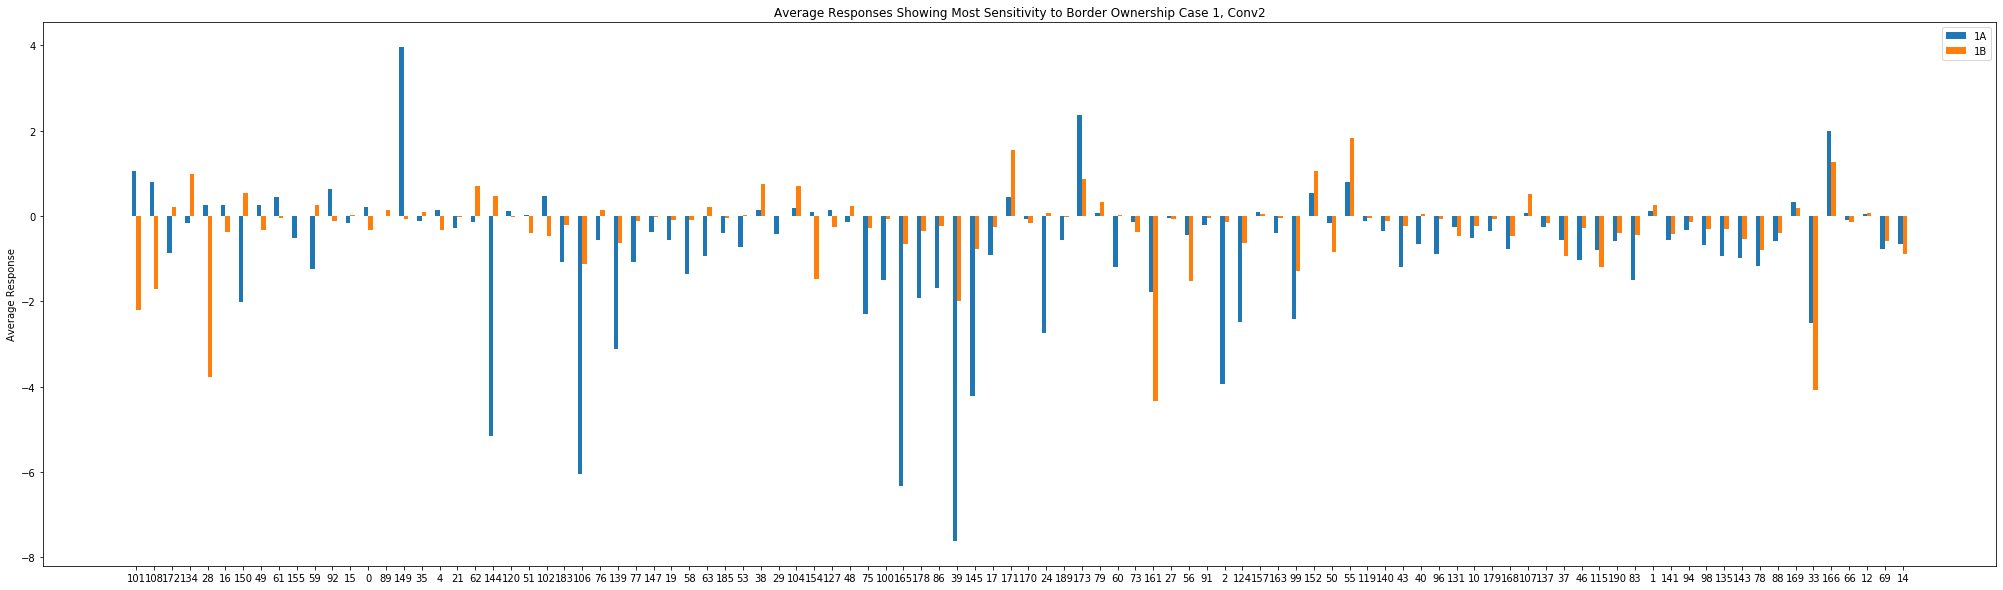

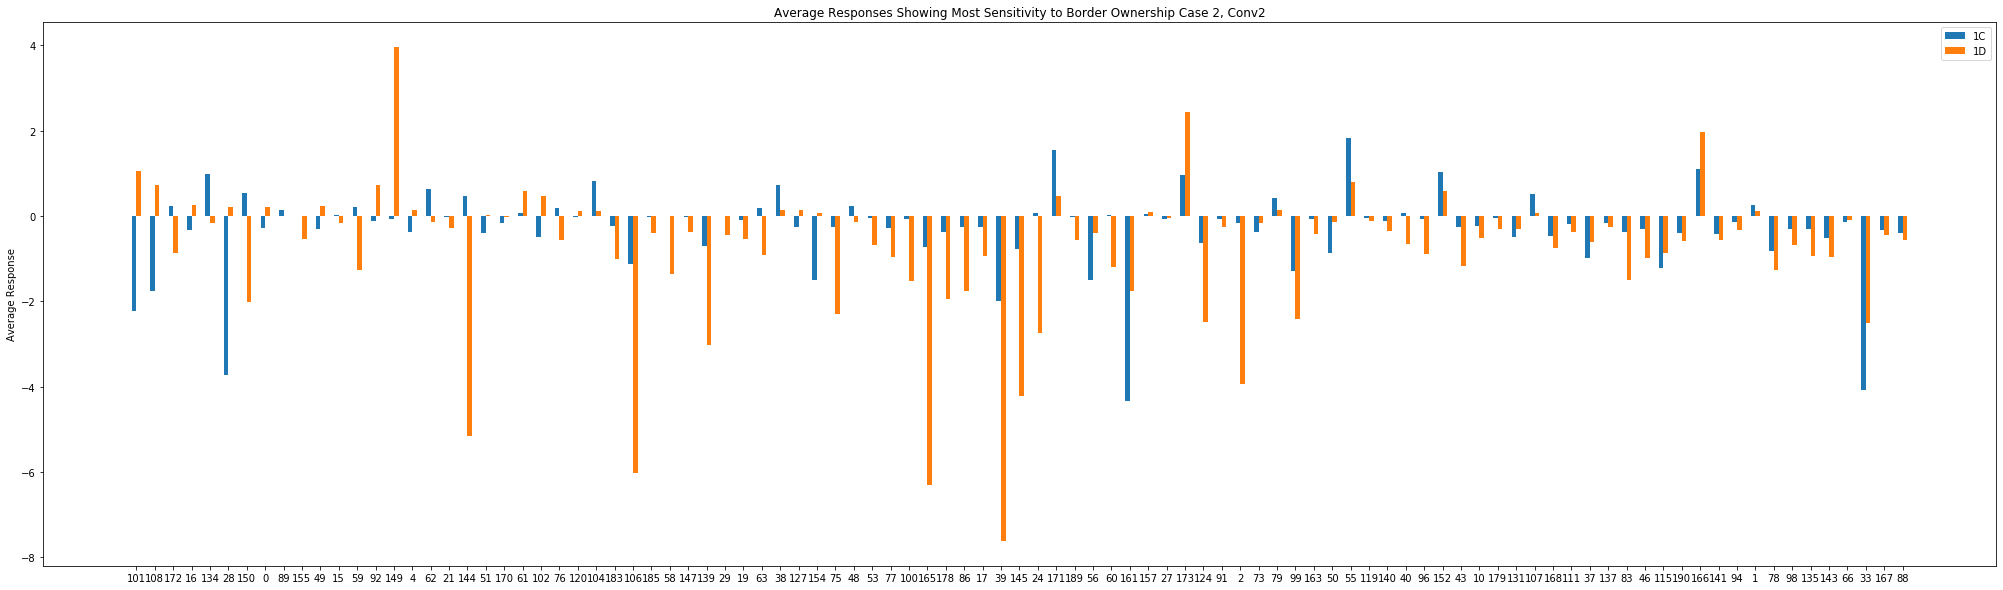

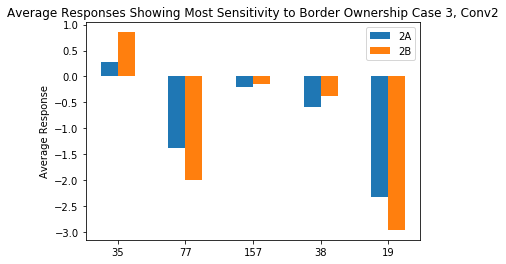

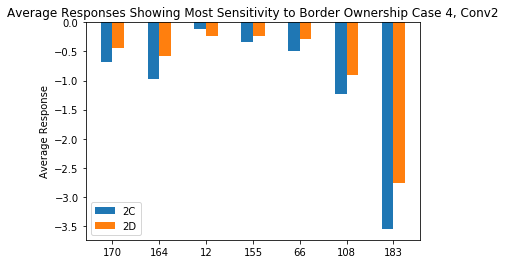

In [21]:
#By layer pull out the sensitivity values. Show some examples
#anything greater than 0.5 could be interesting.. that implies that the difference between the 
#responses is at least 50% of the absolute value of the maximum response (in negative or positive direction)
threshold = 0.5
TopResonders_conv2 = {'1': [], '2': [], '3': [], '4': []}
rfs_2_sensitivities_sorted = sensitivities_2_normed[sensitivities_2_normed[:,1].argsort()[::-1]]
idx, = np.where(rfs_2_sensitivities_sorted[:,1] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_2_sensitivities_sorted[idx[i],0]))
    avs = response_dict_2[kernel][3]
    valsToPlot[i, 0] = avs[0]
    valsToPlot[i, 1] = avs[1]
    labels.append(kernel)
    TopResonders_conv2['1'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(35,10))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='1A')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='1B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 1, Conv2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv2_fnatNormed_topResponders_case1.png")

case = 2
rfs_2_sensitivities_sorted = sensitivities_2_normed[sensitivities_2_normed[:,case].argsort()[::-1]]
idx, = np.where(rfs_2_sensitivities_sorted[:,case] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_2_sensitivities_sorted[idx[i],0]))
    avs = response_dict_2[kernel][3]
    valsToPlot[i, 0] = avs[2]
    valsToPlot[i, 1] = avs[3]
    labels.append(kernel)
    TopResonders_conv2['2'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(35,10))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='1C')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='1D')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 2, Conv2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv2_fnatNormed_topResponders_case2.png")

case = 3
rfs_2_sensitivities_sorted = sensitivities_2_normed[sensitivities_2_normed[:,case].argsort()[::-1]]
idx, = np.where(rfs_2_sensitivities_sorted[:,case] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_2_sensitivities_sorted[idx[i],0]))
    avs = response_dict_2[kernel][3]
    valsToPlot[i, 0] = avs[4]
    valsToPlot[i, 1] = avs[5]
    labels.append(kernel)
    TopResonders_conv2['3'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='2A')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='2B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 3, Conv2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv2_fnatNormed_topResponders_case3.png")

case = 4
rfs_2_sensitivities_sorted = sensitivities_2_normed[sensitivities_2_normed[:,case].argsort()[::-1]]
idx, = np.where(rfs_2_sensitivities_sorted[:,case] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_2_sensitivities_sorted[idx[i],0]))
    avs = response_dict_2[kernel][3]
    valsToPlot[i, 0] = avs[6]
    valsToPlot[i, 1] = avs[7]
    labels.append(kernel)
    TopResonders_conv2['4'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='2C')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='2D')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 4, Conv2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv2_fnatNormed_topResponders_case4.png")

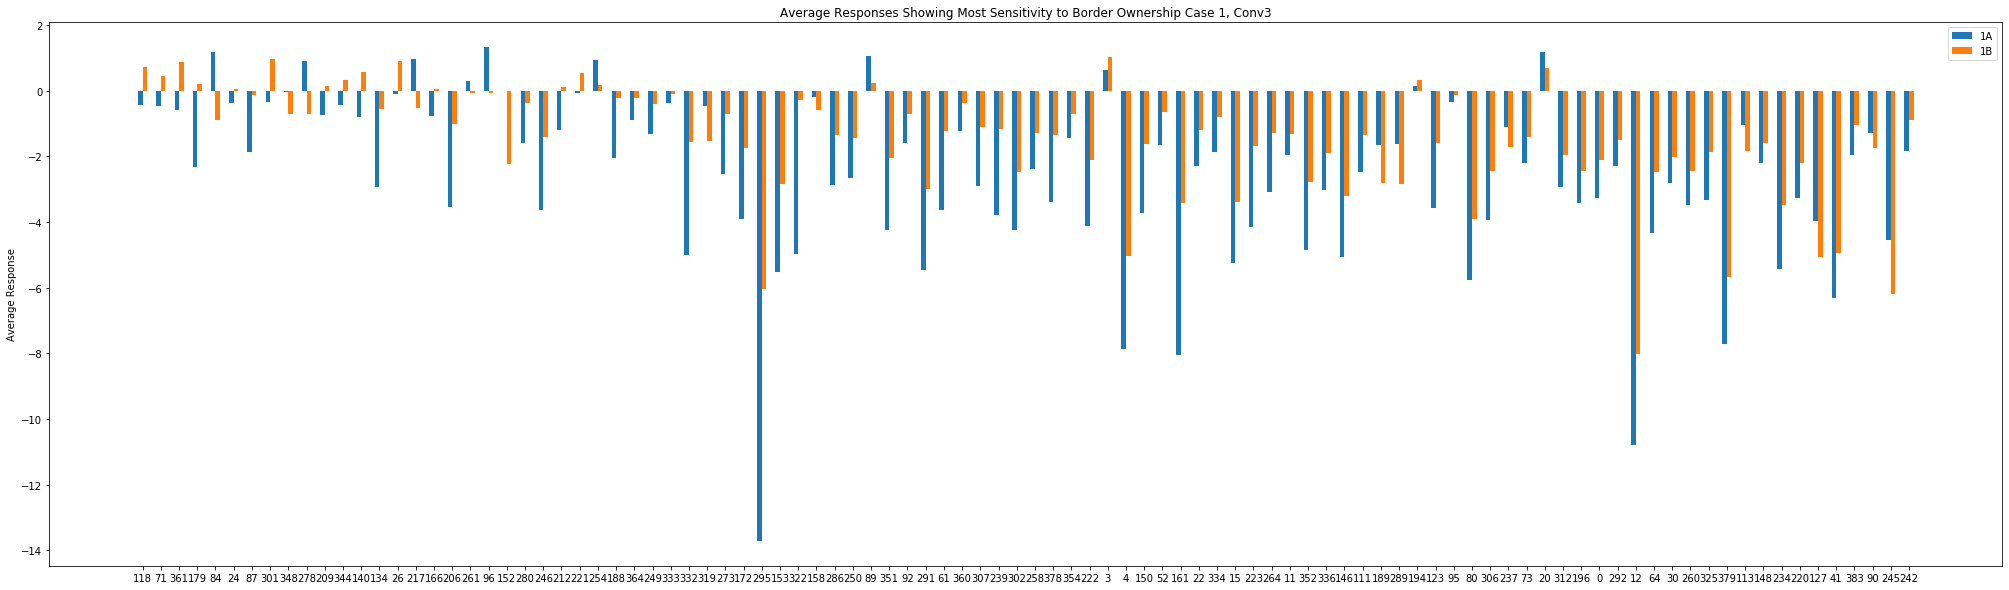

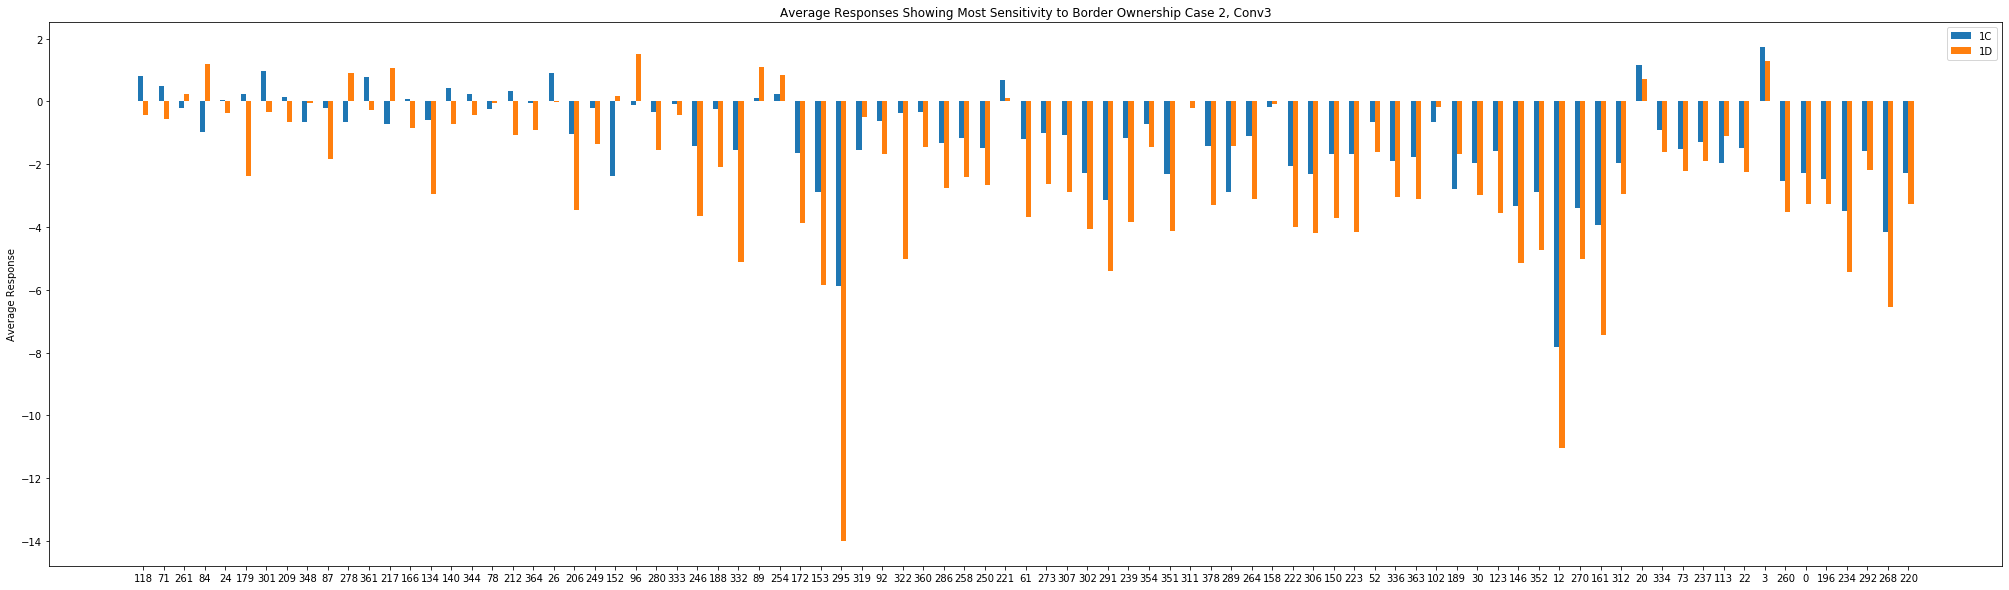

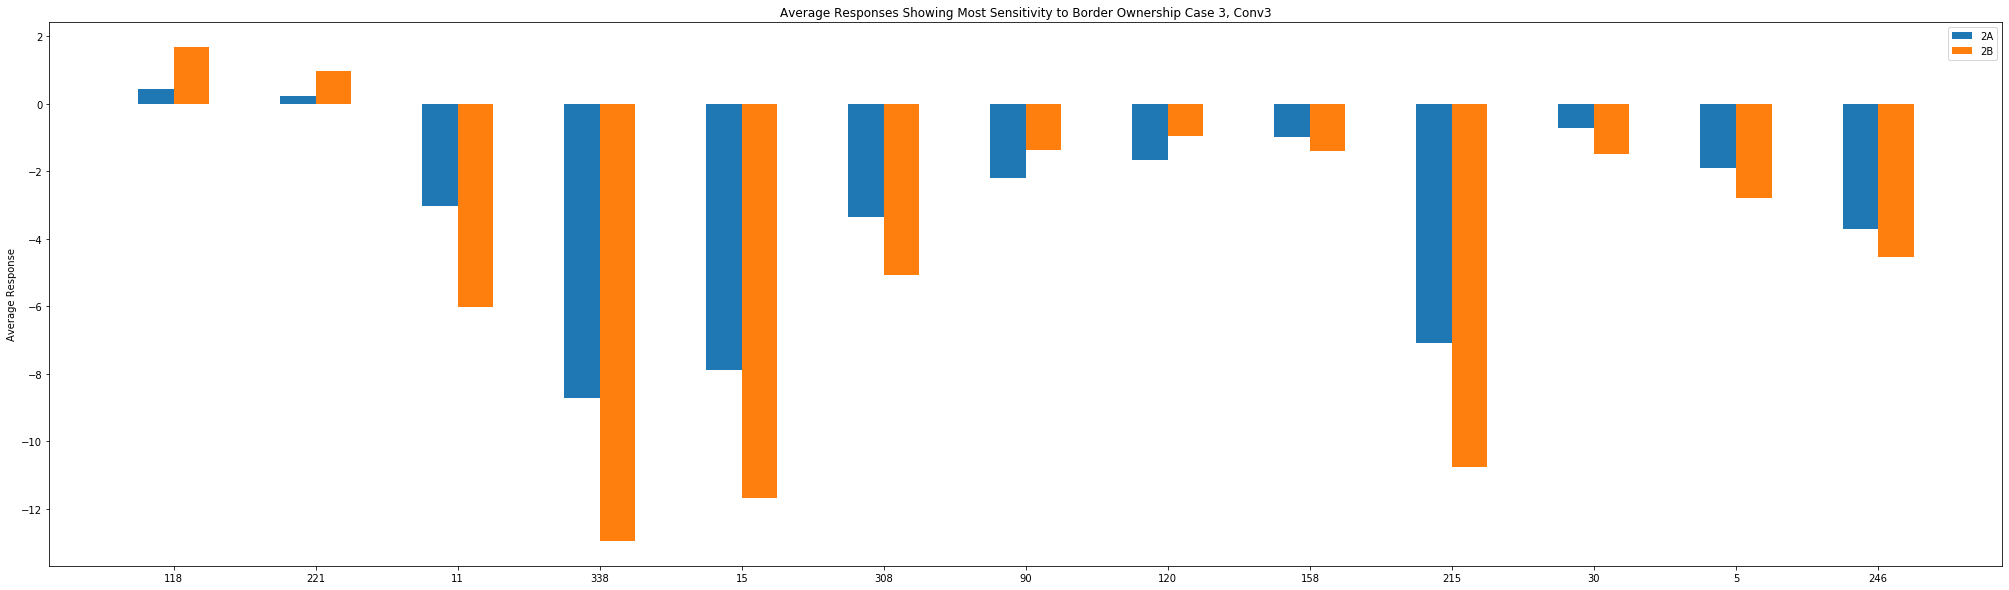

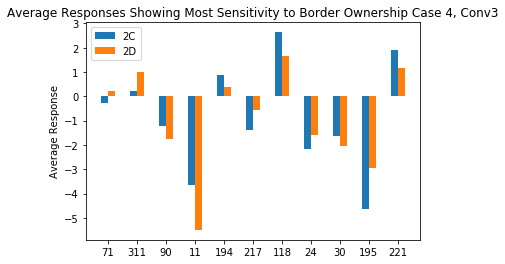

In [22]:
#conv 3 border ownership neurons by image cases
threshold = 0.5
TopResonders_conv3 = {'1': [], '2': [], '3': [], '4': []}
rfs_3_sensitivities_sorted = sensitivities_3_normed[sensitivities_3_normed[:,1].argsort()[::-1]]
idx, = np.where(rfs_3_sensitivities_sorted[:,1] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_3_sensitivities_sorted[idx[i],0]))
    avs = response_dict_3[kernel][3]
    valsToPlot[i, 0] = avs[0]
    valsToPlot[i, 1] = avs[1]
    labels.append(kernel)
    TopResonders_conv3['1'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(35,10))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='1A')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='1B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 1, Conv3')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv3_fnatNormed_topResponders_case1.png")

case = 2
rfs_3_sensitivities_sorted = sensitivities_3_normed[sensitivities_3_normed[:,case].argsort()[::-1]]
idx, = np.where(rfs_3_sensitivities_sorted[:,case] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_3_sensitivities_sorted[idx[i],0]))
    avs = response_dict_3[kernel][3]
    valsToPlot[i, 0] = avs[2]
    valsToPlot[i, 1] = avs[3]
    labels.append(kernel)
    TopResonders_conv3['2'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(35,10))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='1C')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='1D')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 2, Conv3')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv3_fnatNormed_topResponders_case2.png")

case = 3
rfs_3_sensitivities_sorted = sensitivities_3_normed[sensitivities_3_normed[:,case].argsort()[::-1]]
idx, = np.where(rfs_3_sensitivities_sorted[:,case] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_3_sensitivities_sorted[idx[i],0]))
    avs = response_dict_3[kernel][3]
    valsToPlot[i, 0] = avs[4]
    valsToPlot[i, 1] = avs[5]
    labels.append(kernel)
    TopResonders_conv3['3'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(35,10))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='2A')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='2B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 3, Conv3')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv3_fnatNormed_topResponders_case3.png")

case = 4
rfs_3_sensitivities_sorted = sensitivities_3_normed[sensitivities_3_normed[:,case].argsort()[::-1]]
idx, = np.where(rfs_3_sensitivities_sorted[:,case] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_3_sensitivities_sorted[idx[i],0]))
    avs = response_dict_3[kernel][3]
    valsToPlot[i, 0] = avs[6]
    valsToPlot[i, 1] = avs[7]
    labels.append(kernel)
    TopResonders_conv3['4'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='2C')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='2D')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 4, Conv3')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv3_fnatNormed_topResponders_case4.png")

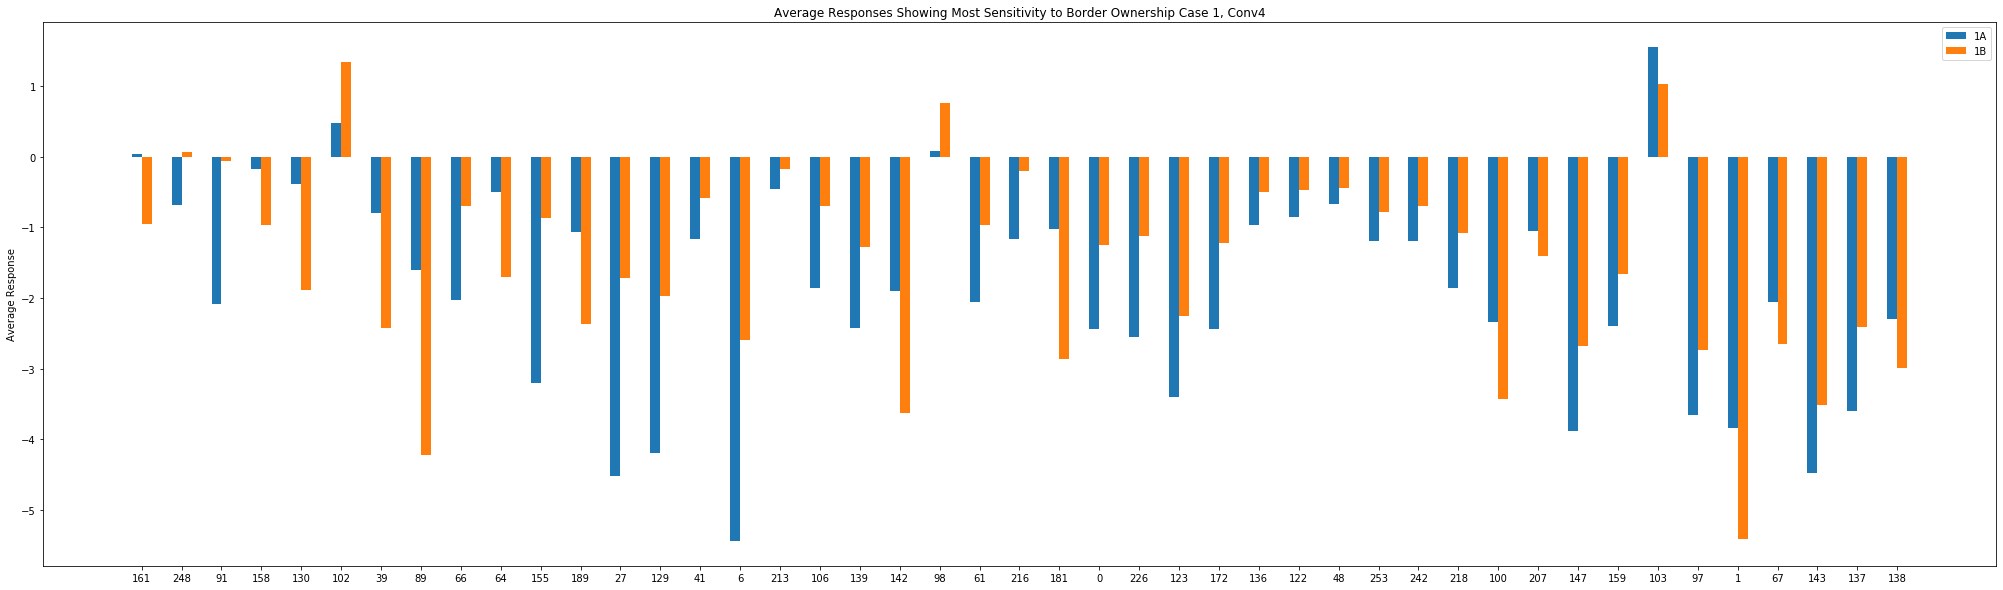

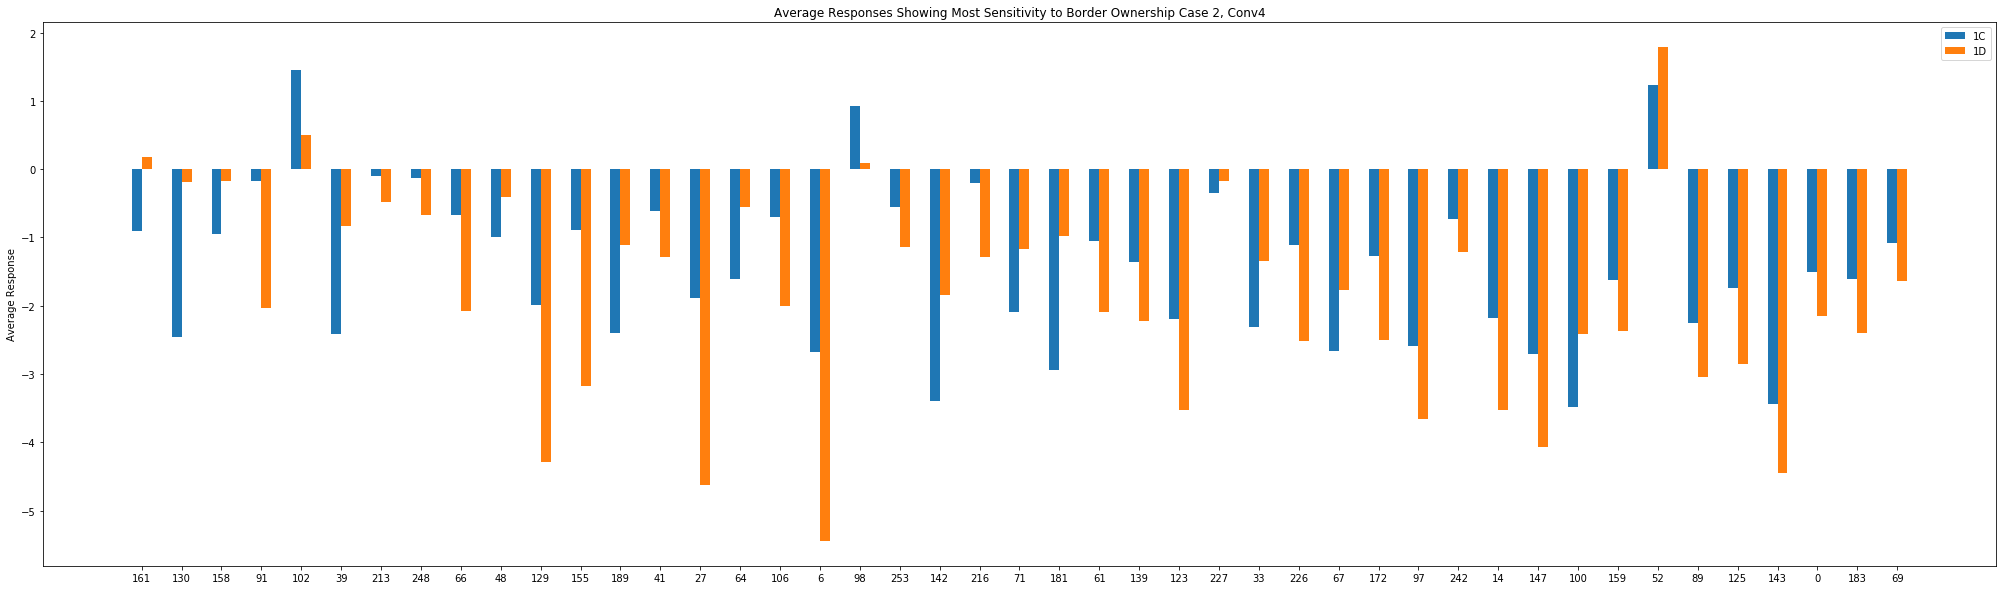

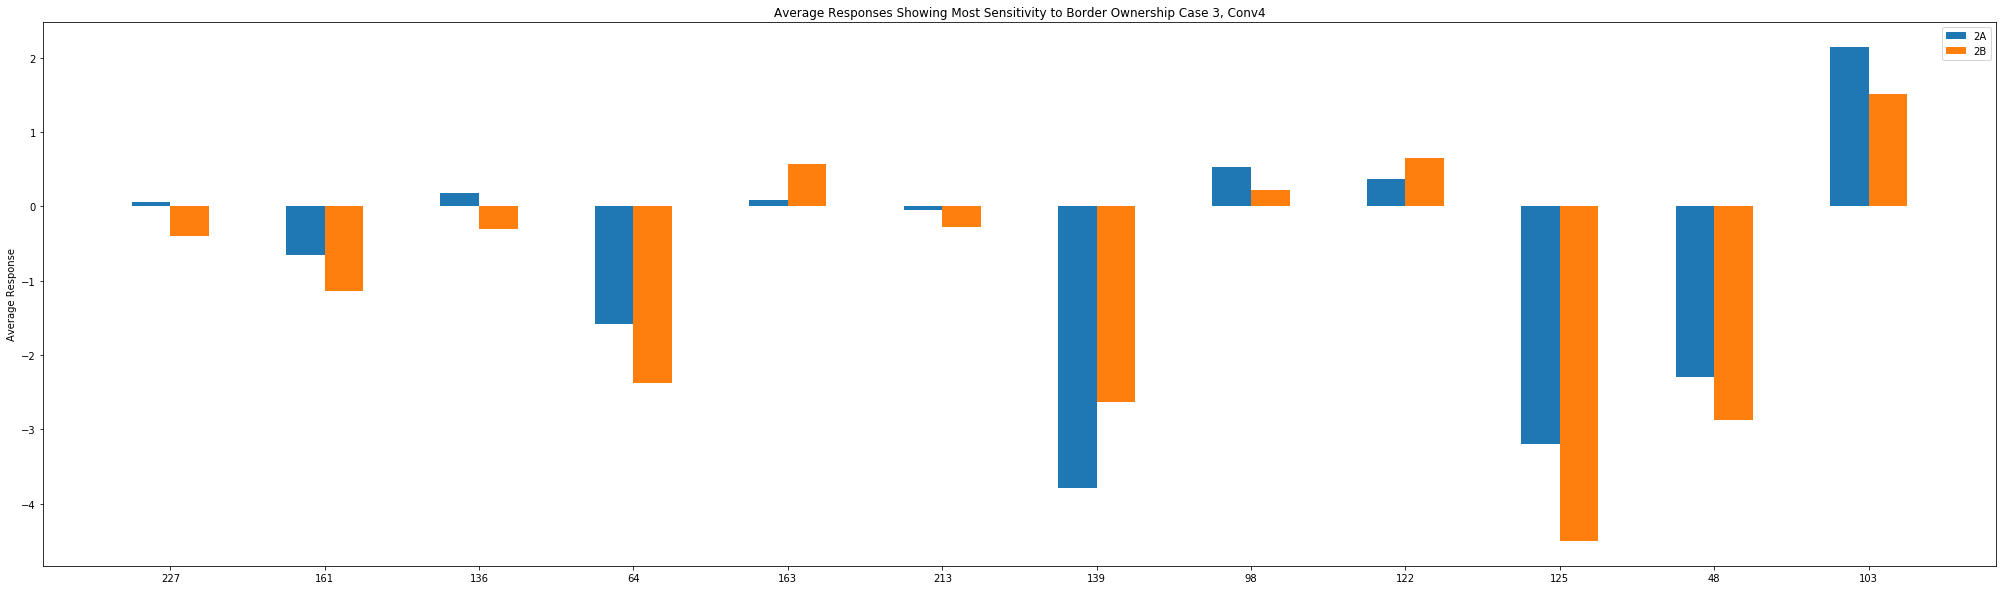

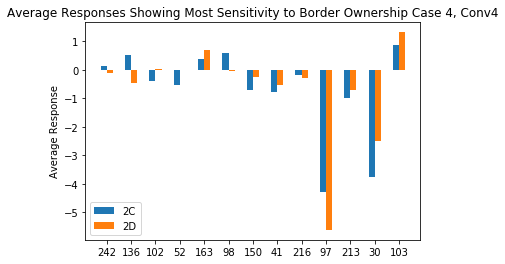

In [18]:
#conv 4 border ownership neurons by image cases
threshold = 0.5
TopResonders_conv4 = {'1': [], '2': [], '3': [], '4': []}
rfs_4_sensitivities_sorted = sensitivities_4_normed[sensitivities_4_normed[:,1].argsort()[::-1]]
idx, = np.where(rfs_4_sensitivities_sorted[:,1] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_4_sensitivities_sorted[idx[i],0]))
    avs = response_dict_4[kernel][3]
    valsToPlot[i, 0] = avs[0]
    valsToPlot[i, 1] = avs[1]
    labels.append(kernel)
    TopResonders_conv4['1'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(35,10))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='1A')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='1B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 1, Conv4')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv4_fnatNormed_topResponders_case1.png")

case = 2
rfs_4_sensitivities_sorted = sensitivities_4_normed[sensitivities_4_normed[:,case].argsort()[::-1]]
idx, = np.where(rfs_4_sensitivities_sorted[:,case] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_4_sensitivities_sorted[idx[i],0]))
    avs = response_dict_4[kernel][3]
    valsToPlot[i, 0] = avs[2]
    valsToPlot[i, 1] = avs[3]
    labels.append(kernel)
    TopResonders_conv4['2'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(35,10))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='1C')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='1D')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 2, Conv4')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv4_fnatNormed_topResponders_case2.png")

case = 3
rfs_4_sensitivities_sorted = sensitivities_4_normed[sensitivities_4_normed[:,case].argsort()[::-1]]
idx, = np.where(rfs_4_sensitivities_sorted[:,case] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_4_sensitivities_sorted[idx[i],0]))
    avs = response_dict_4[kernel][3]
    valsToPlot[i, 0] = avs[4]
    valsToPlot[i, 1] = avs[5]
    labels.append(kernel)
    TopResonders_conv4['3'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(35,10))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='2A')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='2B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 3, Conv4')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv4_fnatNormed_topResponders_case3.png")

case = 4
rfs_4_sensitivities_sorted = sensitivities_4_normed[sensitivities_4_normed[:,case].argsort()[::-1]]
idx, = np.where(rfs_4_sensitivities_sorted[:,case] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_4_sensitivities_sorted[idx[i],0]))
    avs = response_dict_4[kernel][3]
    valsToPlot[i, 0] = avs[6]
    valsToPlot[i, 1] = avs[7]
    labels.append(kernel)
    TopResonders_conv4['4'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='2C')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='2D')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 4, Conv4')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv4_fnatNormed_topResponders_case4.png")

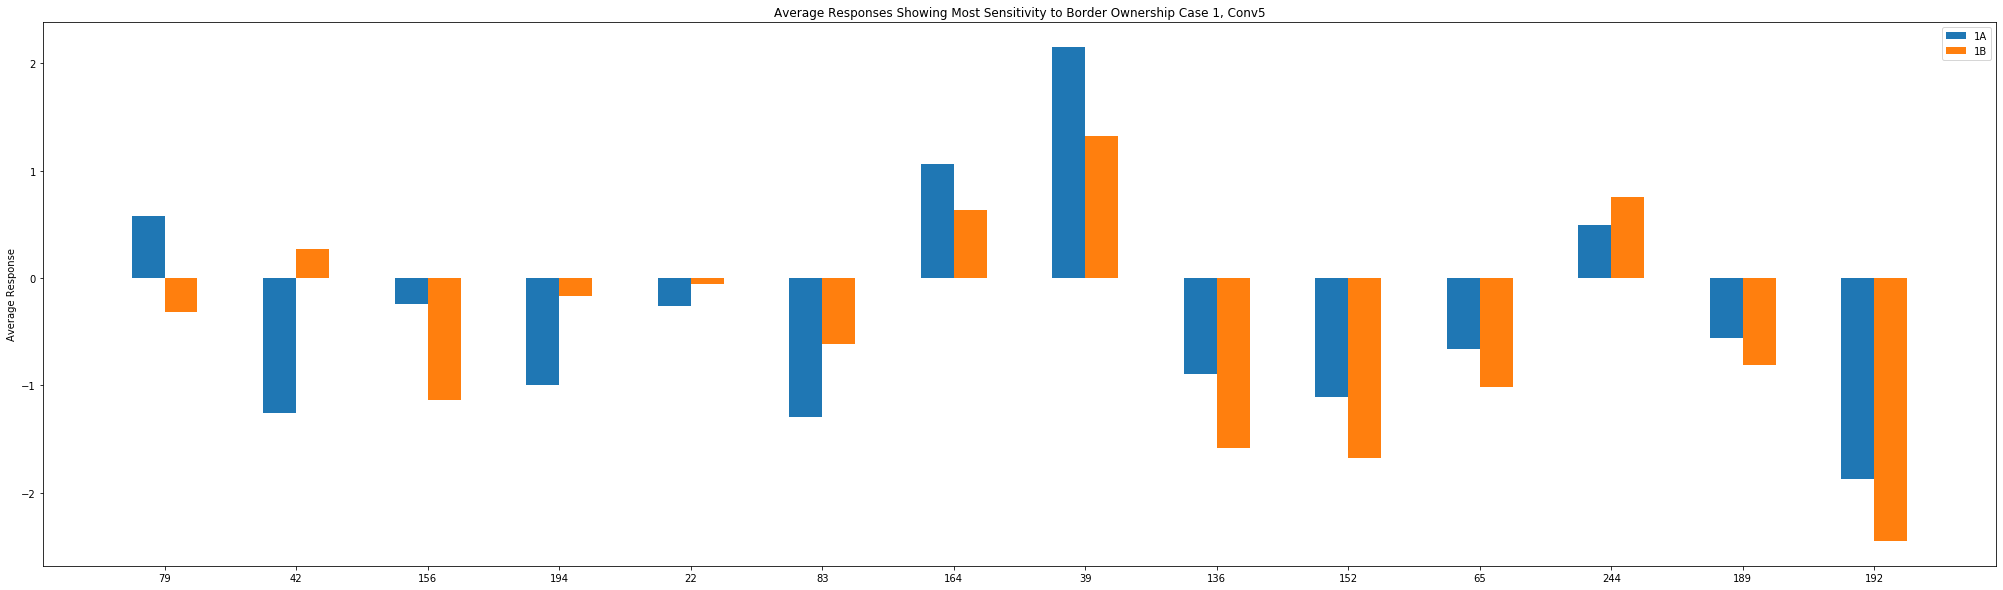

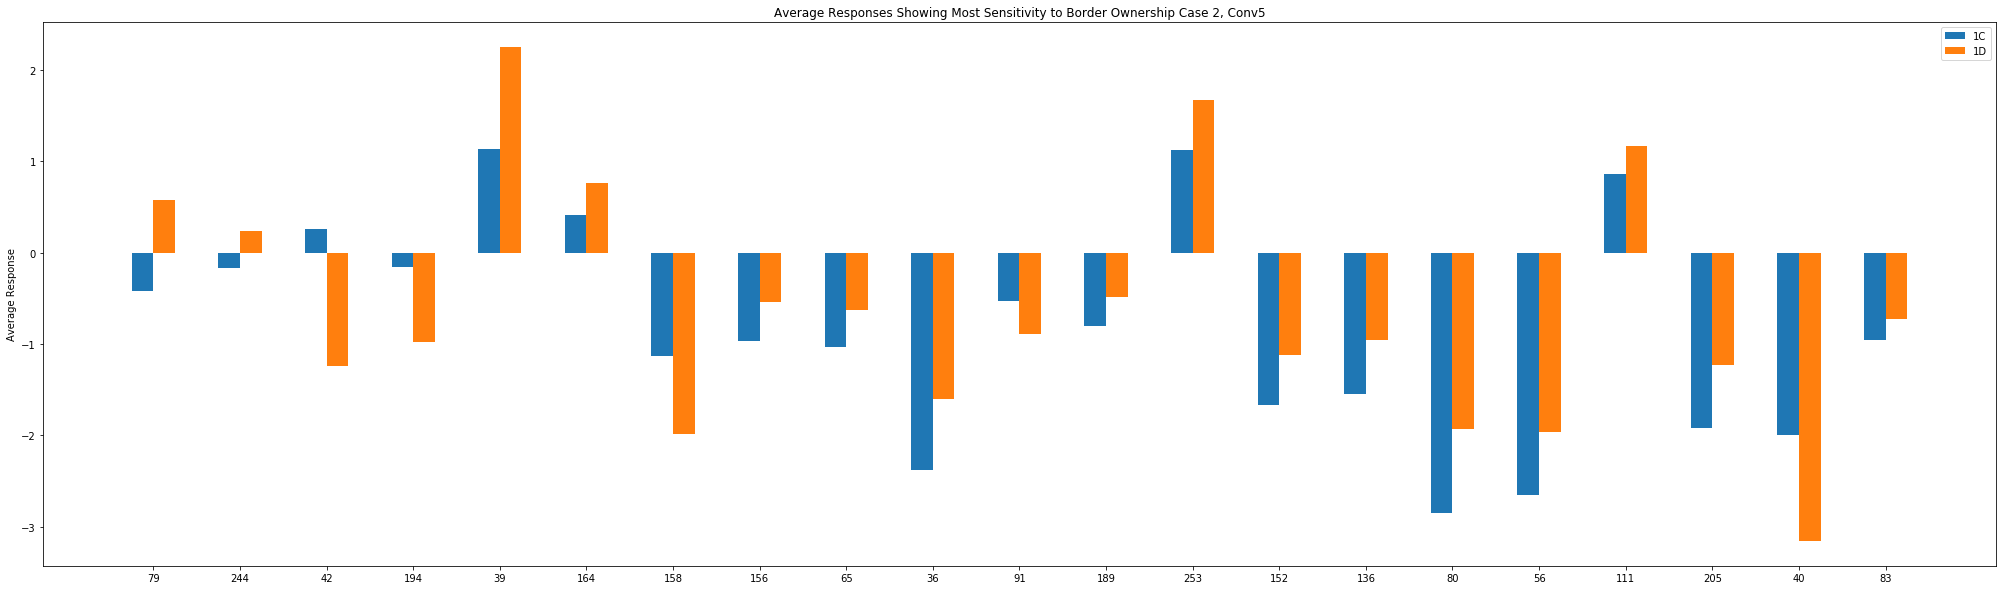

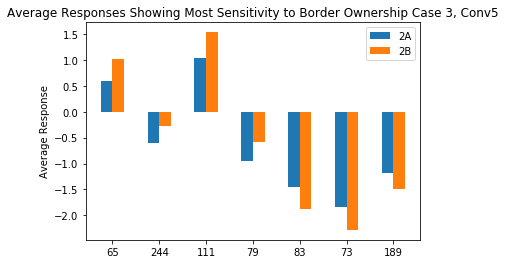

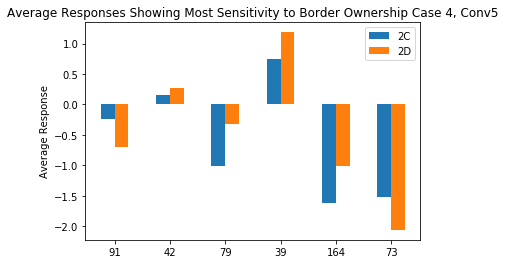

In [19]:
#conv 5 border ownership neurons by image cases
threshold = 0.5
TopResonders_conv5 = {'1': [], '2': [], '3': [], '4': []}
rfs_5_sensitivities_sorted = sensitivities_5_normed[sensitivities_5_normed[:,1].argsort()[::-1]]
idx, = np.where(rfs_5_sensitivities_sorted[:,1] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_5_sensitivities_sorted[idx[i],0]))
    avs = response_dict_5[kernel][3]
    valsToPlot[i, 0] = avs[0]
    valsToPlot[i, 1] = avs[1]
    labels.append(kernel)
    TopResonders_conv5['1'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(35,10))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='1A')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='1B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 1, Conv5')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv5_fnatNormed_topResponders_case1.png")


case = 2
rfs_5_sensitivities_sorted = sensitivities_5_normed[sensitivities_5_normed[:,case].argsort()[::-1]]
idx, = np.where(rfs_5_sensitivities_sorted[:,case] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_5_sensitivities_sorted[idx[i],0]))
    avs = response_dict_5[kernel][3]
    valsToPlot[i, 0] = avs[2]
    valsToPlot[i, 1] = avs[3]
    labels.append(kernel)
    TopResonders_conv5['2'].append(kernel)
    
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(35,10))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='1C')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='1D')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 2, Conv5')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv5_fnatNormed_topResponders_case2.png")


case = 3
rfs_5_sensitivities_sorted = sensitivities_5_normed[sensitivities_5_normed[:,case].argsort()[::-1]]
idx, = np.where(rfs_5_sensitivities_sorted[:,case] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_5_sensitivities_sorted[idx[i],0]))
    avs = response_dict_5[kernel][3]
    valsToPlot[i, 0] = avs[4]
    valsToPlot[i, 1] = avs[5]
    labels.append(kernel)
    TopResonders_conv5['3'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='2A')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='2B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 3, Conv5')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv5_fnatNormed_topResponders_case3.png")

case = 4
rfs_5_sensitivities_sorted = sensitivities_5_normed[sensitivities_5_normed[:,case].argsort()[::-1]]
idx, = np.where(rfs_5_sensitivities_sorted[:,case] > threshold)
valsToPlot = np.empty((len(idx), 2))
labels = []
for i in range(len(idx)):
    kernel = str(int(rfs_5_sensitivities_sorted[idx[i],0]))
    avs = response_dict_5[kernel][3]
    valsToPlot[i, 0] = avs[6]
    valsToPlot[i, 1] = avs[7]
    labels.append(kernel)
    TopResonders_conv5['4'].append(kernel)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, valsToPlot[:,0], width, label='2C')
rects2 = ax.bar(x + width/2, valsToPlot[:,1], width, label='2D')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Response')
ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership Case 4, Conv5')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("conv5_fnatNormed_topResponders_case4.png")

[0, 1, 0, 1]

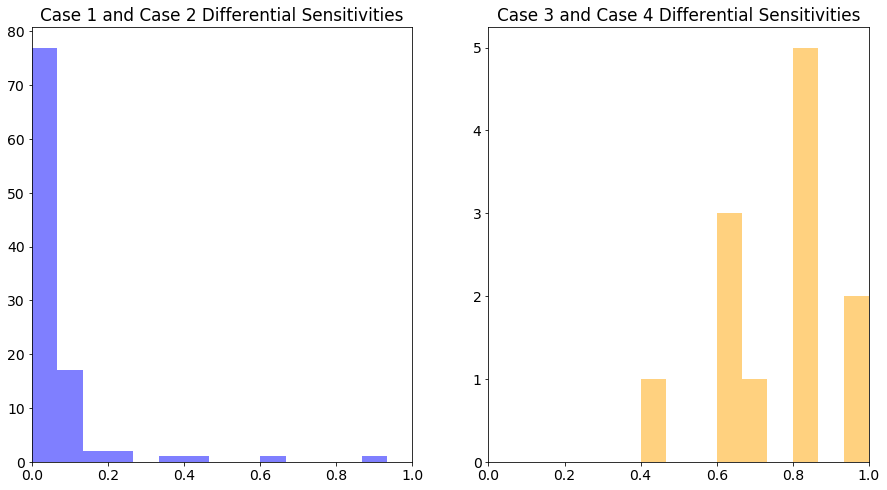

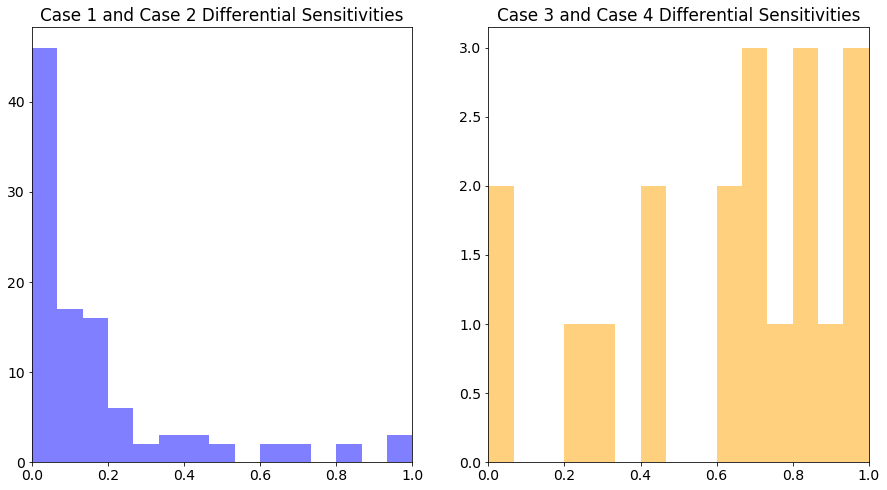

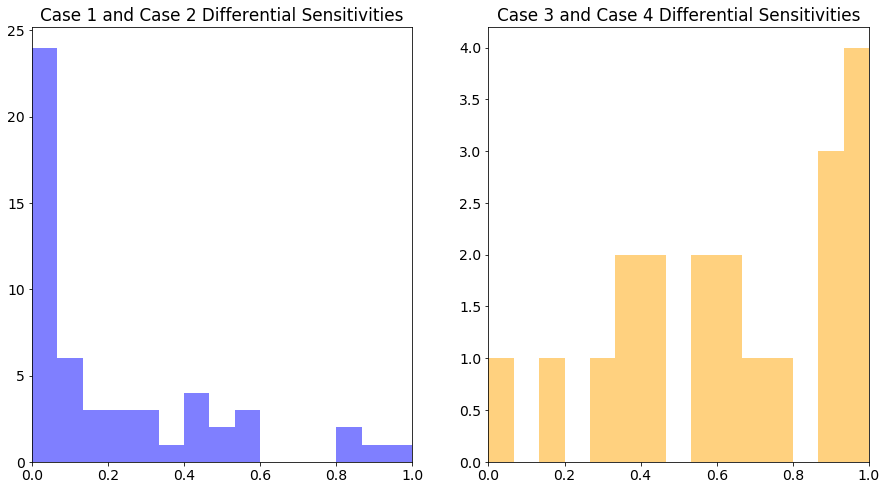

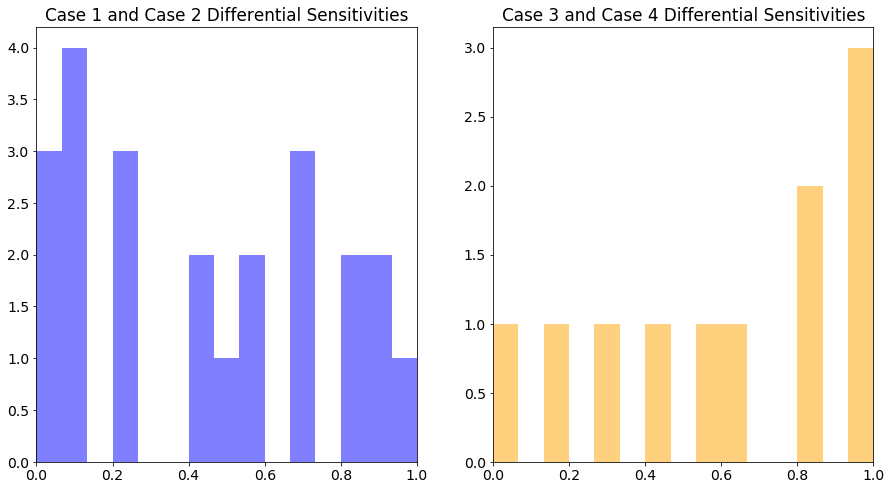

In [110]:
#find cells that are unique to one or the other border ownership case
#conv2
differential_sensitivities_conv2_12 = []
differential_sensitivities_conv2_34 = []
for i in range(rfs_2_sensitivities_sorted.shape[0]):
    kernel = rfs_2_sensitivities_sorted[i,0]
    differential_sensitivities_conv2[i, 0] = kernel
    if (rfs_2_sensitivities_sorted[i,1] > threshold) or (rfs_2_sensitivities_sorted[i,2] > threshold):
        dif_sensitivity_12 = (np.abs(rfs_2_sensitivities_sorted[i,1] - rfs_2_sensitivities_sorted[i,2])) / (np.maximum(rfs_2_sensitivities_sorted[i,1], rfs_2_sensitivities_sorted[i,2]))
        to_append = np.array([kernel, dif_sensitivity_12])
        differential_sensitivities_conv2_12.append(to_append)
    if (rfs_2_sensitivities_sorted[i,3] > threshold) or (rfs_2_sensitivities_sorted[i,4] > threshold):
        dif_sensitivity_34 = (np.abs(rfs_2_sensitivities_sorted[i,3] - rfs_2_sensitivities_sorted[i,4])) / (np.maximum(rfs_2_sensitivities_sorted[i,3], rfs_2_sensitivities_sorted[i,4]))
        to_append = np.array([kernel, dif_sensitivity_34])
        differential_sensitivities_conv2_34.append(to_append)

differential_sensitivities_conv2_12 = np.array(differential_sensitivities_conv2_12)
differential_sensitivities_conv2_34 = np.array(differential_sensitivities_conv2_34)

bins = 15
# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (0, 1)

fig, axs = plt.subplots(1, 2, figsize=(15,8))
axs[0].hist(differential_sensitivities_conv2_12[:, 1], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0].set_title('Case 1 and Case 2 Differential Sensitivities')
axs[1].hist(differential_sensitivities_conv2_34[:, 1], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1].set_title('Case 3 and Case 4 Differential Sensitivities')
# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim)

#conv3
differential_sensitivities_conv3_12 = []
differential_sensitivities_conv3_34 = []
for i in range(rfs_3_sensitivities_sorted.shape[0]):
    kernel = rfs_3_sensitivities_sorted[i,0]
    differential_sensitivities_conv3[i, 0] = kernel
    if (rfs_3_sensitivities_sorted[i,1] > threshold) or (rfs_3_sensitivities_sorted[i,2] > threshold):
        dif_sensitivity_12 = (np.abs(rfs_3_sensitivities_sorted[i,1] - rfs_3_sensitivities_sorted[i,2])) / (np.maximum(rfs_3_sensitivities_sorted[i,1], rfs_3_sensitivities_sorted[i,2]))
        to_append = np.array([kernel, dif_sensitivity_12])
        differential_sensitivities_conv3_12.append(to_append)
    if (rfs_3_sensitivities_sorted[i,3] > threshold) or (rfs_3_sensitivities_sorted[i,4] > threshold):
        dif_sensitivity_34 = (np.abs(rfs_3_sensitivities_sorted[i,3] - rfs_3_sensitivities_sorted[i,4])) / (np.maximum(rfs_3_sensitivities_sorted[i,3], rfs_3_sensitivities_sorted[i,4]))
        to_append = np.array([kernel, dif_sensitivity_34])
        differential_sensitivities_conv3_34.append(to_append)

differential_sensitivities_conv3_12 = np.array(differential_sensitivities_conv3_12)
differential_sensitivities_conv3_34 = np.array(differential_sensitivities_conv3_34)

fig, axs = plt.subplots(1, 2, figsize=(15,8))
axs[0].hist(differential_sensitivities_conv3_12[:, 1], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0].set_title('Case 1 and Case 2 Differential Sensitivities')
axs[1].hist(differential_sensitivities_conv3_34[:, 1], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1].set_title('Case 3 and Case 4 Differential Sensitivities')
# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim)

#conv4
differential_sensitivities_conv4_12 = []
differential_sensitivities_conv4_34 = []
for i in range(rfs_4_sensitivities_sorted.shape[0]):
    kernel = rfs_4_sensitivities_sorted[i,0]
    differential_sensitivities_conv4[i, 0] = kernel
    if (rfs_4_sensitivities_sorted[i,1] > threshold) or (rfs_4_sensitivities_sorted[i,2] > threshold):
        dif_sensitivity_12 = (np.abs(rfs_4_sensitivities_sorted[i,1] - rfs_4_sensitivities_sorted[i,2])) / (np.maximum(rfs_4_sensitivities_sorted[i,1], rfs_4_sensitivities_sorted[i,2]))
        to_append = np.array([kernel, dif_sensitivity_12])
        differential_sensitivities_conv4_12.append(to_append)
    if (rfs_4_sensitivities_sorted[i,3] > threshold) or (rfs_4_sensitivities_sorted[i,4] > threshold):
        dif_sensitivity_34 = (np.abs(rfs_4_sensitivities_sorted[i,3] - rfs_4_sensitivities_sorted[i,4])) / (np.maximum(rfs_4_sensitivities_sorted[i,3], rfs_4_sensitivities_sorted[i,4]))
        to_append = np.array([kernel, dif_sensitivity_34])
        differential_sensitivities_conv4_34.append(to_append)

differential_sensitivities_conv4_12 = np.array(differential_sensitivities_conv4_12)
differential_sensitivities_conv4_34 = np.array(differential_sensitivities_conv4_34)

fig, axs = plt.subplots(1, 2, figsize=(15,8))
axs[0].hist(differential_sensitivities_conv4_12[:, 1], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0].set_title('Case 1 and Case 2 Differential Sensitivities')
axs[1].hist(differential_sensitivities_conv4_34[:, 1], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1].set_title('Case 3 and Case 4 Differential Sensitivities')
# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim)

#conv5
differential_sensitivities_conv5_12 = []
differential_sensitivities_conv5_34 = []
for i in range(rfs_5_sensitivities_sorted.shape[0]):
    kernel = rfs_5_sensitivities_sorted[i,0]
    differential_sensitivities_conv5[i, 0] = kernel
    if (rfs_5_sensitivities_sorted[i,1] > threshold) or (rfs_5_sensitivities_sorted[i,2] > threshold):
        dif_sensitivity_12 = (np.abs(rfs_5_sensitivities_sorted[i,1] - rfs_5_sensitivities_sorted[i,2])) / (np.maximum(rfs_5_sensitivities_sorted[i,1], rfs_5_sensitivities_sorted[i,2]))
        to_append = np.array([kernel, dif_sensitivity_12])
        differential_sensitivities_conv5_12.append(to_append)
    if (rfs_5_sensitivities_sorted[i,3] > threshold) or (rfs_5_sensitivities_sorted[i,4] > threshold):
        dif_sensitivity_34 = (np.abs(rfs_5_sensitivities_sorted[i,3] - rfs_5_sensitivities_sorted[i,4])) / (np.maximum(rfs_5_sensitivities_sorted[i,3], rfs_5_sensitivities_sorted[i,4]))
        to_append = np.array([kernel, dif_sensitivity_34])
        differential_sensitivities_conv5_34.append(to_append)

differential_sensitivities_conv5_12 = np.array(differential_sensitivities_conv5_12)
differential_sensitivities_conv5_34 = np.array(differential_sensitivities_conv5_34)

fig, axs = plt.subplots(1, 2, figsize=(15,8))
axs[0].hist(differential_sensitivities_conv5_12[:, 1], bins=bins, range=custom_xlim, facecolor='blue', alpha=0.5)
axs[0].set_title('Case 1 and Case 2 Differential Sensitivities')
axs[1].hist(differential_sensitivities_conv5_34[:, 1], bins=bins, range=custom_xlim, facecolor='orange', alpha=0.5)
axs[1].set_title('Case 3 and Case 4 Differential Sensitivities')
# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim)

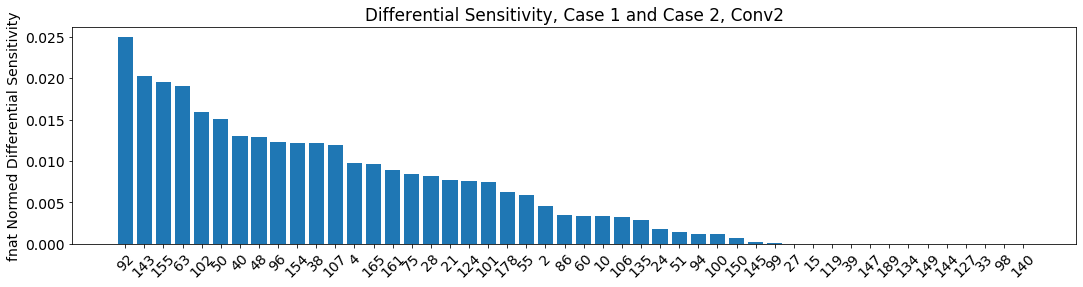

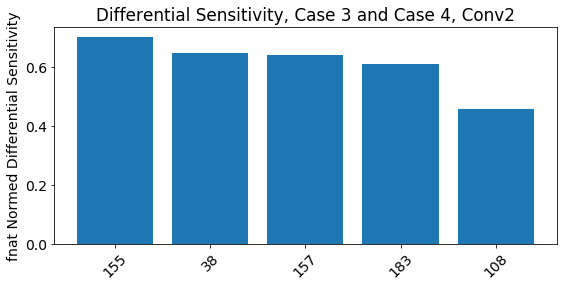

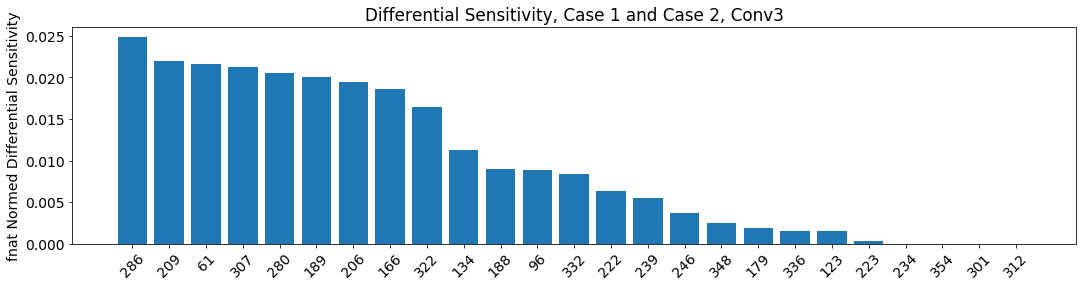

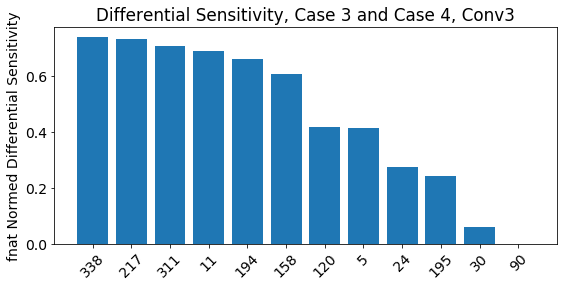

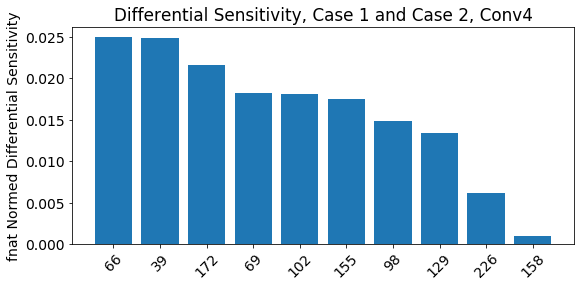

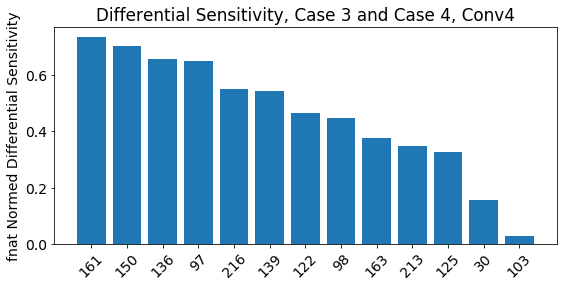

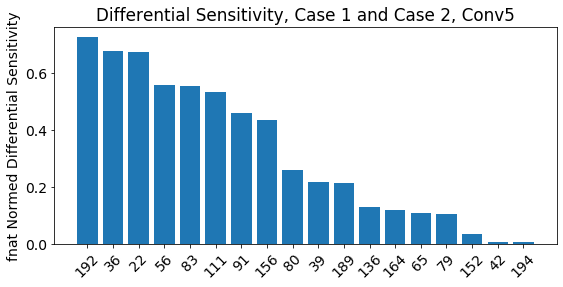

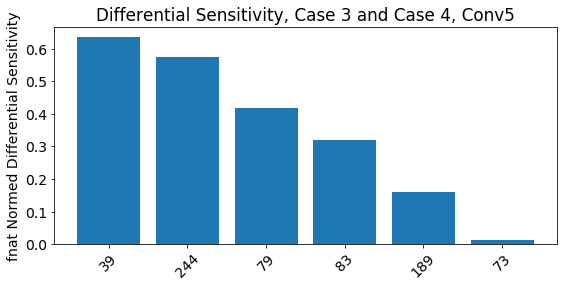

In [121]:
plt.rcParams.update({'font.size': 14})

ind_2_1, = np.where((differential_sensitivities_conv2_12[:, 1] < 0.025))
ind_2_2, = np.where((differential_sensitivities_conv2_34[:, 1] < 0.75))

diff_sensitivities_sorted_2_1 = differential_sensitivities_conv2_12[ind_2_1, :][differential_sensitivities_conv2_12[ind_2_1, 1].argsort()[::-1]]
diff_sensitivities_sorted_2_2 = differential_sensitivities_conv2_34[ind_2_2, :][differential_sensitivities_conv2_34[ind_2_2, 1].argsort()[::-1]]

x = np.arange(len(ind_2_1))  # the label locations
labels = diff_sensitivities_sorted_2_1[:,0].astype(int)
fig, ax = plt.subplots(figsize=(18,4))
rects1 = ax.bar(x, diff_sensitivities_sorted_2_1[:, 1])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('fnat Normed Differential Sensitivity')
ax.set_title('Differential Sensitivity, Case 1 and Case 2, Conv2')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
plt.savefig("conv2_fnatNormed_diffsens_case12.png")

x = np.arange(len(ind_2_2))  # the label locations
labels = diff_sensitivities_sorted_2_2[:,0].astype(int)
fig, ax = plt.subplots(figsize=(9,4))
rects1 = ax.bar(x, diff_sensitivities_sorted_2_2[:, 1])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('fnat Normed Differential Sensitivity')
ax.set_title('Differential Sensitivity, Case 3 and Case 4, Conv2')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
plt.savefig("conv2_fnatNormed_diffsens_case34.png")

ind_3_1, = np.where((differential_sensitivities_conv3_12[:, 1]  < 0.025))
ind_3_2, = np.where((differential_sensitivities_conv3_34[:, 1]  < 0.75))

diff_sensitivities_sorted_3_1 = differential_sensitivities_conv3_12[ind_3_1, :][differential_sensitivities_conv3_12[ind_3_1, 1].argsort()[::-1]]
diff_sensitivities_sorted_3_2 = differential_sensitivities_conv3_34[ind_3_2, :][differential_sensitivities_conv3_34[ind_3_2, 1].argsort()[::-1]]

x = np.arange(len(ind_3_1))  # the label locations
labels = diff_sensitivities_sorted_3_1[:,0].astype(int)
fig, ax = plt.subplots(figsize=(18,4))
rects1 = ax.bar(x, diff_sensitivities_sorted_3_1[:, 1])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('fnat Normed Differential Sensitivity')
ax.set_title('Differential Sensitivity, Case 1 and Case 2, Conv3')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
plt.savefig("conv3_fnatNormed_diffsens_case12.png")

x = np.arange(len(ind_3_2))  # the label locations
labels = diff_sensitivities_sorted_3_2[:,0].astype(int)
fig, ax = plt.subplots(figsize=(9,4))
rects1 = ax.bar(x, diff_sensitivities_sorted_3_2[:, 1])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('fnat Normed Differential Sensitivity')
ax.set_title('Differential Sensitivity, Case 3 and Case 4, Conv3')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
plt.savefig("conv3_fnatNormed_diffsens_case34.png")

ind_4_1, = np.where((differential_sensitivities_conv4_12[:, 1]  < 0.025))
ind_4_2, = np.where((differential_sensitivities_conv4_34[:, 1]  < 0.75))

diff_sensitivities_sorted_4_1 = differential_sensitivities_conv4_12[ind_4_1, :][differential_sensitivities_conv4_12[ind_4_1, 1].argsort()[::-1]]
diff_sensitivities_sorted_4_2 = differential_sensitivities_conv4_34[ind_4_2, :][differential_sensitivities_conv4_34[ind_4_2, 1].argsort()[::-1]]

x = np.arange(len(ind_4_1))  # the label locations
labels = diff_sensitivities_sorted_4_1[:,0].astype(int)
fig, ax = plt.subplots(figsize=(9,4))
rects1 = ax.bar(x, diff_sensitivities_sorted_4_1[:, 1])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('fnat Normed Differential Sensitivity')
ax.set_title('Differential Sensitivity, Case 1 and Case 2, Conv4')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
plt.savefig("conv4_fnatNormed_diffsens_case12.png")

x = np.arange(len(ind_4_2))  # the label locations
labels = diff_sensitivities_sorted_4_2[:,0].astype(int)
fig, ax = plt.subplots(figsize=(9,4))
rects1 = ax.bar(x, diff_sensitivities_sorted_4_2[:, 1])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('fnat Normed Differential Sensitivity')
ax.set_title('Differential Sensitivity, Case 3 and Case 4, Conv4')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
plt.savefig("conv4_fnatNormed_diffsens_case34.png")

ind_5_1, = np.where((differential_sensitivities_conv5_12[:, 1]  < 0.75))
ind_5_2, = np.where((differential_sensitivities_conv5_34[:, 1]  < 0.75))

diff_sensitivities_sorted_5_1 = differential_sensitivities_conv5_12[ind_5_1, :][differential_sensitivities_conv5_12[ind_5_1, 1].argsort()[::-1]]
diff_sensitivities_sorted_5_2 = differential_sensitivities_conv5_34[ind_5_2, :][differential_sensitivities_conv5_34[ind_5_2, 1].argsort()[::-1]]

x = np.arange(len(ind_5_1))  # the label locations
labels = diff_sensitivities_sorted_5_1[:,0].astype(int)
fig, ax = plt.subplots(figsize=(9,4))
rects1 = ax.bar(x, diff_sensitivities_sorted_5_1[:, 1])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('fnat Normed Differential Sensitivity')
ax.set_title('Differential Sensitivity, Case 1 and Case 2, Conv5')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
plt.savefig("conv5_fnatNormed_diffsens_case12.png")

x = np.arange(len(ind_5_2))  # the label locations
labels = diff_sensitivities_sorted_5_2[:,0].astype(int)
fig, ax = plt.subplots(figsize=(9,4))
rects1 = ax.bar(x, diff_sensitivities_sorted_5_2[:, 1])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('fnat Normed Differential Sensitivity')
ax.set_title('Differential Sensitivity, Case 3 and Case 4, Conv5')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
plt.savefig("conv5_fnatNormed_diffsens_case34.png")

In [31]:
differential_sensitivities_conv2.shape

(125, 3)

In [44]:
ind_2_1

(array([  0,   2,   8,  15,  41,  52,  56,  62,  64,  70,  84,  86, 111]),)

In [46]:
x

array([0])

In [102]:
np.array(differential_sensitivities_conv2_12)[

array([170.        ,   0.37213347])

In [112]:
diff_sensitivities_sorted_3_2.shape

(1, 3)